In [1]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
sns.set_style('white')
#plt.rcParams["figure.dpi"] = 600
from sklearn.model_selection import train_test_split

In [2]:
# fg -> umol 14 (N mulecular weight) * 1e-9 (fmol -> umol)
# switch to C biomass
Qp = 12.5  * 1e-9 / 14
Qp

8.92857142857143e-10

In [3]:
import statsmodels.api as sm

In [4]:
%load_ext autoreload
%autoreload 2
#import CCPA_lib as cp

In [5]:
horder = ['Axenic', 'HOT1A3', 'HP15', 'Pgall', 'CIP', 'DSS-3', 'nitzsch',
       'mit0604', 'k-12', 'HOT5_F3', 'HOT5_C3']


In [6]:
os.listdir('data')

['10cc metadata.xlsx',
 'Growth curves A-D Yara.xlsx',
 'Yara_pro99_axenic.xlsx',
 '10cc FACS results.xlsx',
 '10cc FL.xlsx',
 'CCPA.pkl.gz']

In [7]:
#data = pd.read_excel(os.path.join('data', 'Osnat_20CC_het_select.xlsx'), 
#              index_col='date', sheet_name='FL').T.reset_index(drop=True)
data_df = pd.read_excel(os.path.join('data', '10cc FL.xlsx'), 
              index_col='date', sheet_name='FL0').T.reset_index(drop=True)
data1_df = pd.read_excel(os.path.join('data', '10cc FL.xlsx'), 
              index_col='date', sheet_name='FL1').T.reset_index(drop=True)
data4_df = pd.read_excel(os.path.join('data', '10cc FL.xlsx'), 
              index_col='date', sheet_name='FL2').T.reset_index(drop=True)
data5_df = pd.read_excel(os.path.join('data', '10cc FL.xlsx'), 
              index_col='date', sheet_name='FL3').T.reset_index(drop=True)
data6_df = pd.read_excel(os.path.join('data', '10cc FL.xlsx'), 
              index_col='date', sheet_name='FL4').T.reset_index(drop=True)
data7_df = pd.read_excel(os.path.join('data', '10cc FL.xlsx'), 
              index_col='date', sheet_name='FL5').T.reset_index(drop=True)

In [8]:
pro99_df = pd.read_excel(os.path.join('data', 'Yara_pro99_axenic.xlsx',))

In [9]:
pro99_df.columns

Index(['Date', 'Day', 'Pro99_axenicA', 'Pro99_axenicB', 'Pro99_axenicC'], dtype='object')

In [10]:
pro99_mdf = pro99_df.melt(id_vars=['Date', 'Day'], value_name='FL', var_name='Sample', )

In [11]:
#data = pd.read_excel(os.path.join('data', 'Osnat_20CC_het_select.xlsx'), 
#              index_col='date', sheet_name='FL').T.reset_index(drop=True)
data2_df = pd.read_excel(os.path.join('data', '10cc FL.xlsx'), 
              index_col='date', sheet_name='3FL transfer0').T.reset_index(drop=True)

In [12]:
#data = pd.read_excel(os.path.join('data', 'Osnat_20CC_het_select.xlsx'), 
#              index_col='date', sheet_name='FL').T.reset_index(drop=True)
data3_df = pd.read_excel(os.path.join('data', '10cc FL.xlsx'), 
              index_col='date', sheet_name='3FL transfer 1').T.reset_index(drop=True)

In [13]:
meta_df = pd.read_excel(os.path.join('data', '10cc metadata.xlsx'), 
               sheet_name='metadata') #.T.reset_index(drop=True)
meta2_df = pd.read_excel(os.path.join('data', '10cc metadata.xlsx'), 
               sheet_name='metadata2') #.T.reset_index(drop=True)

In [14]:
os.listdir('data')

['10cc metadata.xlsx',
 'Growth curves A-D Yara.xlsx',
 'Yara_pro99_axenic.xlsx',
 '10cc FACS results.xlsx',
 '10cc FL.xlsx',
 'CCPA.pkl.gz']

In [15]:
 fcm_df = pd.read_excel(os.path.join('data', '10cc FACS results.xlsx'))
 fcm_df

,Unnamed: 0,tube,Sample,id,replicate,transfer,dilution,sybr,problematic,flow,heterotroph,full name,date,transfer day,med4,het,med4 | Count,med4 beads | Count,het | Count
0,0,specimen_1_CC_001+sybr_Tube_002_032.fcs,1A1,1,A,1.0,100.0,sybr,NaN,0.15690,Axenic,Axenic,2021-05-12 11:49:00,19.817361,NaN,NaN,NaN,NaN,NaN
1,1,specimen_1_CC_001+sybr_Tube_003_033.fcs,1B1,1,B,1.0,100.0,sybr,NaN,0.15690,Axenic,Axenic,2021-05-12 11:49:00,19.817361,NaN,NaN,NaN,NaN,NaN
2,2,specimen_1_CC_001+sybr_Tube_004_034.fcs,1C1,1,C,1.0,100.0,sybr,NaN,0.15690,Axenic,Axenic,2021-05-12 11:49:00,19.817361,NaN,NaN,NaN,NaN,NaN
3,4,specimen_1_CC_001+sybr_Tube_006_036.fcs,2B1,2,B,1.0,100.0,sybr,NaN,0.15690,HOT1A3,A. macleodii 1A3,2021-05-12 11:49:00,19.817361,NaN,NaN,NaN,NaN,NaN
4,5,specimen_1_CC_001+sybr_Tube_007_037.fcs,2C1,2,C,1.0,100.0,sybr,NaN,0.15690,HOT1A3,A. macleodii 1A3,2021-05-12 11:49:00,19.817361,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,485,specimen_3_CC+sybr_Tube_032_190.fcs,9C5,9,C,5.0,100.0,sybr,NaN,0.12555,k-12,E. coli,2021-08-29 15:49:00,128.984028,NaN,NaN,NaN,NaN,5.0
467,486,specimen_3_CC+sybr_Tube_033_191.fcs,10C5,10,C,5.0,100.0,sybr,NaN,0.12555,HOT5_F3,Marinovum 5F3,2021-08-29 15:49:00,128.984028,NaN,4.488252e+06,NaN,NaN,5635.0
468,487,specimen_3_CC+sybr_Tube_034_192.fcs,11C5,11,C,5.0,100.0,sybr,NaN,0.12555,HOT5_C3,Roseovarius 5C3,2021-08-29 15:49:00,128.984028,NaN,1.673437e+06,NaN,NaN,2101.0
469,488,Mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,37479.0


In [16]:
fcm_df.columns

Index(['Unnamed: 0', 'tube', 'Sample', 'id', 'replicate', 'transfer',
       'dilution', 'sybr', 'problematic', 'flow', 'heterotroph', 'full name',
       'date', 'transfer day', 'med4', 'het', 'med4 | Count',
       'med4 beads | Count', 'het | Count'],
      dtype='object')

In [17]:
fcm_mdf= fcm_df.loc[fcm_df.problematic != 'yes'].melt(
    id_vars=['tube', 'Sample', 'id', 'replicate', 'transfer',
        'heterotroph', 'full name',
       'date', 'transfer day',],
    value_vars=['med4', 'het',],)


In [18]:
fcm_mdf = fcm_mdf.dropna(subset=['value'])

In [19]:
mdf1 = pd.melt(data_df, id_vars='day', var_name='Sample', value_name='FL')
mdf11= pd.melt(data1_df, id_vars='day', var_name='Sample', value_name='FL')
mdf2 = pd.melt(data2_df, id_vars='day', var_name='Sample', value_name='FL')
mdf3 = pd.melt(data3_df, id_vars='day', var_name='Sample', value_name='FL')
mdf4 = pd.melt(data4_df, id_vars='day', var_name='Sample', value_name='FL')
mdf5 = pd.melt(data5_df, id_vars='day', var_name='Sample', value_name='FL')
mdf6 = pd.melt(data6_df, id_vars='day', var_name='Sample', value_name='FL')
mdf7 = pd.melt(data7_df, id_vars='day', var_name='Sample', value_name='FL')


In [20]:
mdf = pd.concat([mdf1, mdf11, mdf2, mdf3, mdf4, mdf5, mdf6, mdf7])

In [21]:
mdf.head()

,day,Sample,FL
0,0.000000,1A0,0.122
1,1.081944,1A0,0.034
2,2.164583,1A0,0.159
3,2.747222,1A0,0.227
4,3.754167,1A0,0.306


In [22]:
mdf['id'] = pd.to_numeric(mdf.Sample.str.slice(start=0, stop=-2))
mdf['replicate'] = mdf.Sample.str.slice(start=-2, stop=-1)
mdf['transfer'] = pd.to_numeric(mdf.Sample.str.slice(start=-1))


In [23]:
mdf = pd.merge(mdf, meta_df, on='id', how='left')
mdf = pd.merge(mdf, meta2_df, on='transfer', how='left')


In [24]:
mdf.columns

Index(['day', 'Sample', 'FL', 'id', 'replicate', 'transfer', 'heterotroph',
       'full name', 'date', 'transfer day'],
      dtype='object')

In [25]:
d2 = mdf.loc[mdf['full name'].isin(['Axenic'])].copy()
d2['full name'] = 'Axenic2'
d3 = mdf.loc[mdf['full name'].isin(['Axenic'])].copy()
d3['full name'] = 'Axenic3'
d4 = mdf.loc[mdf['full name'].isin(['Axenic'])].copy()
d4['full name'] = 'Axenic4'



In [26]:
mdf['full name'].unique()

array(['Axenic', 'A. macleodii 1A3', 'Marinobacter adhaerens HP15',
       'Phaeobacter gallaeciensis', 'Pseudoalteromonas haloplanktis',
       'Ruegeria pomeroyi', 'Sulfitobacter pseudonitzschiae',
       'Prochlorococcus mit0604', 'E. coli', 'Marinovum 5F3',
       'Roseovarius 5C3'], dtype=object)

In [169]:
axenic = ['Axenic']

group1 = ['A. macleodii 1A3', 'Pseudoalteromonas haloplanktis',]

group2 = ['Sulfitobacter pseudonitzschiae','Ruegeria pomeroyi', ]
group3 = [ #'Prochlorococcus mit0604',
    'E. coli',
         'Marinovum 5F3','Roseovarius 5C3']
group4 = [ 
       'Marinobacter adhaerens HP15',
       'Phaeobacter gallaeciensis', ]

mdf.loc[mdf['full name'].isin(axenic), 'Group'] = 'Axenic'
mdf.loc[mdf['full name'].isin(group1), 'Group'] = 'Strong'
mdf.loc[mdf['full name'].isin(group2), 'Group'] = 'Sustained'
mdf.loc[mdf['full name'].isin(group3), 'Group'] = 'Weak'
mdf.loc[mdf['full name'].isin(group4), 'Group'] = 'Inhibited'

horder =  group1 + group2 + group3 + group4 + ['Axenic']
# ['Axenic', 'HOT1A3',  'CIP',  'nitzsch', 'mit0604',
#           'DSS-3','k-12','HOT5_F3', 'HOT5_C3'
#           'HP15', 'Pgall',
#          ]
gorder = ['Sustained', 'Strong', 'Weak', 'Inhibited',   'Axenic',  ]
hpalette1 = sns.color_palette("Dark2", n_colors=len(group1)).as_hex() 
hpalette2 = sns.color_palette("terrain", n_colors=len(group2)).as_hex()  
hpalette3 = sns.color_palette("winter", n_colors=len(group3)+1).as_hex()[1:]  
hpalette4 = sns.color_palette("spring", n_colors=len(group4)).as_hex()

transfer_days = [20, 42, 60, 81, 129]
transfer_days = [42, 60, 81, 129]


hpalette =  hpalette1 + hpalette2 + hpalette3 + hpalette4 + ['black']
gpalette = [ hpalette[7], hpalette[1], hpalette[3], hpalette[5], hpalette[9],]
sns.color_palette(hpalette)


[(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.3333333333333333, 0.8666666666666667, 0.4666666666666667),
 (0.6666666666666666, 0.5725490196078431, 0.4196078431372549),
 (0.0, 0.4, 0.8),
 (0.0, 0.6, 0.6980392156862745),
 (0.0, 0.8, 0.6),
 (1.0, 0.3333333333333333, 0.6666666666666666),
 (1.0, 0.6666666666666666, 0.3333333333333333),
 (0.0, 0.0, 0.0)]

In [28]:
hpalette

['#1b9e77',
 '#d95f02',
 '#55dd77',
 '#aa926b',
 '#0066cc',
 '#0099b2',
 '#00cc99',
 '#ff55aa',
 '#ffaa55',
 'black']

In [29]:
transfer_days

[42, 60, 81, 129]

In [30]:
fcm_mdf['transfer_success'] = fcm_mdf['Sample'].map((mdf.groupby(['Sample'])['FL'].max() > 0.1))

In [31]:
gorder

['Sustained', 'Strong', 'Weak', 'Inhibited', 'Axenic']

In [32]:
fcm_mdf.variable.unique()
fcm_mdf.variable = fcm_mdf.variable.map({
    'med4' : 'med4 (FCM)', 
    'het' : 'het (FCM)', 
})

In [33]:
fcm_mdf['Sample'] = fcm_mdf['id'].astype('str') + fcm_mdf['replicate'] + '0'

In [34]:
fcm_mdf.loc[fcm_mdf.variable.isin(['med4 (FCM)']) & ~fcm_mdf.id.isin([8])]

,tube,Sample,id,replicate,transfer,heterotroph,full name,date,transfer day,variable,value,transfer_success
26,specimen_1_CC_001_Tube_002_001.fcs,1A0,1,A,1.0,Axenic,Axenic,2021-05-12 11:49:00,19.817361,med4 (FCM),9.581642e+06,True
27,specimen_1_CC_001_Tube_003_002.fcs,1B0,1,B,1.0,Axenic,Axenic,2021-05-12 11:49:00,19.817361,med4 (FCM),4.938495e+06,False
28,specimen_1_CC_001_Tube_004_003.fcs,1C0,1,C,1.0,Axenic,Axenic,2021-05-12 11:49:00,19.817361,med4 (FCM),4.415860e+06,False
29,specimen_1_CC_001_Tube_005_004.fcs,2A0,2,A,1.0,HOT1A3,A. macleodii 1A3,2021-05-12 11:49:00,19.817361,med4 (FCM),4.240275e+07,True
30,specimen_1_CC_001_Tube_006_005.fcs,2B0,2,B,1.0,HOT1A3,A. macleodii 1A3,2021-05-12 11:49:00,19.817361,med4 (FCM),6.931002e+07,True
...,...,...,...,...,...,...,...,...,...,...,...,...
314,specimen_3_CC_Tube_028_154.fcs,5C0,5,C,5.0,CIP,Pseudoalteromonas haloplanktis,2021-08-29 15:49:00,128.984028,med4 (FCM),6.403112e+04,False
315,specimen_3_CC_Tube_029_155.fcs,6C0,6,C,5.0,DSS-3,Ruegeria pomeroyi,2021-08-29 15:49:00,128.984028,med4 (FCM),8.053329e+05,False
316,specimen_3_CC_Tube_030_156.fcs,7C0,7,C,5.0,nitzsch,Sulfitobacter pseudonitzschiae,2021-08-29 15:49:00,128.984028,med4 (FCM),1.304324e+05,False
317,specimen_3_CC_Tube_032_157.fcs,9C0,9,C,5.0,k-12,E. coli,2021-08-29 15:49:00,128.984028,med4 (FCM),1.472393e+03,False


In [35]:
rel_mdf = mdf.loc[(mdf.transfer == 0) & (mdf.id != 8)].copy()

In [36]:
rel_fcmdf = fcm_mdf.loc[fcm_mdf.variable.isin(['med4 (FCM)']) & ~fcm_mdf.id.isin([8])].copy()

In [37]:
rel_mdf['roundday'] = rel_mdf.day.astype(int)
rel_fcmdf['roundday'] = rel_fcmdf['transfer day'].astype(int)


In [38]:
rel_fcmdf

,tube,Sample,id,replicate,transfer,heterotroph,full name,date,transfer day,variable,value,transfer_success,roundday
26,specimen_1_CC_001_Tube_002_001.fcs,1A0,1,A,1.0,Axenic,Axenic,2021-05-12 11:49:00,19.817361,med4 (FCM),9.581642e+06,True,19
27,specimen_1_CC_001_Tube_003_002.fcs,1B0,1,B,1.0,Axenic,Axenic,2021-05-12 11:49:00,19.817361,med4 (FCM),4.938495e+06,False,19
28,specimen_1_CC_001_Tube_004_003.fcs,1C0,1,C,1.0,Axenic,Axenic,2021-05-12 11:49:00,19.817361,med4 (FCM),4.415860e+06,False,19
29,specimen_1_CC_001_Tube_005_004.fcs,2A0,2,A,1.0,HOT1A3,A. macleodii 1A3,2021-05-12 11:49:00,19.817361,med4 (FCM),4.240275e+07,True,19
30,specimen_1_CC_001_Tube_006_005.fcs,2B0,2,B,1.0,HOT1A3,A. macleodii 1A3,2021-05-12 11:49:00,19.817361,med4 (FCM),6.931002e+07,True,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,specimen_3_CC_Tube_028_154.fcs,5C0,5,C,5.0,CIP,Pseudoalteromonas haloplanktis,2021-08-29 15:49:00,128.984028,med4 (FCM),6.403112e+04,False,128
315,specimen_3_CC_Tube_029_155.fcs,6C0,6,C,5.0,DSS-3,Ruegeria pomeroyi,2021-08-29 15:49:00,128.984028,med4 (FCM),8.053329e+05,False,128
316,specimen_3_CC_Tube_030_156.fcs,7C0,7,C,5.0,nitzsch,Sulfitobacter pseudonitzschiae,2021-08-29 15:49:00,128.984028,med4 (FCM),1.304324e+05,False,128
317,specimen_3_CC_Tube_032_157.fcs,9C0,9,C,5.0,k-12,E. coli,2021-08-29 15:49:00,128.984028,med4 (FCM),1.472393e+03,False,128


In [39]:
train_df = pd.merge(rel_fcmdf, rel_mdf, on=['Sample', 'roundday'], how='left' )

In [40]:
train_df.isna().sum()

tube                0
Sample              0
id_x                0
replicate_x         0
transfer_x          0
heterotroph_x       0
full name_x         0
date_x              0
transfer day_x      0
variable            0
value               0
transfer_success    0
roundday            0
day                 0
FL                  0
id_y                0
replicate_y         0
transfer_y          0
heterotroph_y       0
full name_y         0
date_y              0
transfer day_y      0
Group               0
dtype: int64

In [41]:
train_df = train_df.rename(columns={'value': 'FCM'})

In [42]:
train_df['LOD'] = train_df.FL <= 0.04

In [43]:
train_df['log10FCM'] = np.log10(train_df.FCM)
train_df['log10FL'] = np.log10(train_df.FL.clip(lower=0.04))

In [44]:
x = train_df.loc[~train_df.LOD, 'FL']
y= train_df.loc[~train_df.LOD,'FCM']
#x = sm.add_constant(x)

In [45]:
model = sm.OLS(y, x)

In [46]:
results = model.fit()

In [47]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    FCM   R-squared (uncentered):                   0.735
Model:                            OLS   Adj. R-squared (uncentered):              0.733
Method:                 Least Squares   F-statistic:                              385.2
Date:                Fri, 27 Oct 2023   Prob (F-statistic):                    6.74e-42
Time:                        16:28:34   Log-Likelihood:                         -2500.8
No. Observations:                 140   AIC:                                      5004.
Df Residuals:                     139   BIC:                                      5007.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [48]:
print(f"coefficient of determination: {results.rsquared}")
print(f"adjusted coefficient of determination: {results.rsquared_adj}")
print(f"regression coefficients: {results.params}")

coefficient of determination: 0.7348435618384501
adjusted coefficient of determination: 0.7329359615639066
regression coefficients: FL    2.626432e+07
dtype: float64


In [49]:
train_df['predicted'] = results.predict( train_df['FL'])
train_df['predicted_Bp'] = train_df['predicted']* Qp * 1e3
train_df['ref_Bp'] = train_df['FCM']* Qp * 1e3

In [50]:
predicted_below_LOD = results.predict([0.04, 0.1])
f'{predicted_below_LOD[0]:.2e}, {predicted_below_LOD[1]:.2e}, '

'1.05e+06, 2.63e+06, '

In [51]:
predicted_below_LOD * Qp * 1e3, 1e6* Qp * 1e3, 

(array([0.93801129, 2.34502821]), 0.8928571428571429)

In [52]:
mdf['predicted'] = results.predict(mdf['FL'])

In [53]:
mdf['ref_Bp[N]'] = mdf['predicted']* Qp * 1e3
mdf['ref_Bp[C]'] = mdf['ref_Bp[N]'] * 6.625


In [54]:
pro99_mdf = pro99_mdf.rename(columns={'Day': 'day'})


In [55]:
pro99_mdf['Group'] = 'Axenic_PRO99'
pro99_mdf['full name'] = 'Axenic_PRO99'
pro99_mdf['predicted'] = results.predict(pro99_mdf['FL'])
pro99_mdf['ref_Bp[N]'] = pro99_mdf['predicted']* Qp * 1e3
pro99_mdf['ref_Bp[C]'] = pro99_mdf['ref_Bp[N]'] * 6.625


In [56]:
pro99_mdf.columns

Index(['Date', 'day', 'Sample', 'FL', 'Group', 'full name', 'predicted',
       'ref_Bp[N]', 'ref_Bp[C]'],
      dtype='object')

<Axes: xlabel='FL', ylabel='ref_Bp'>

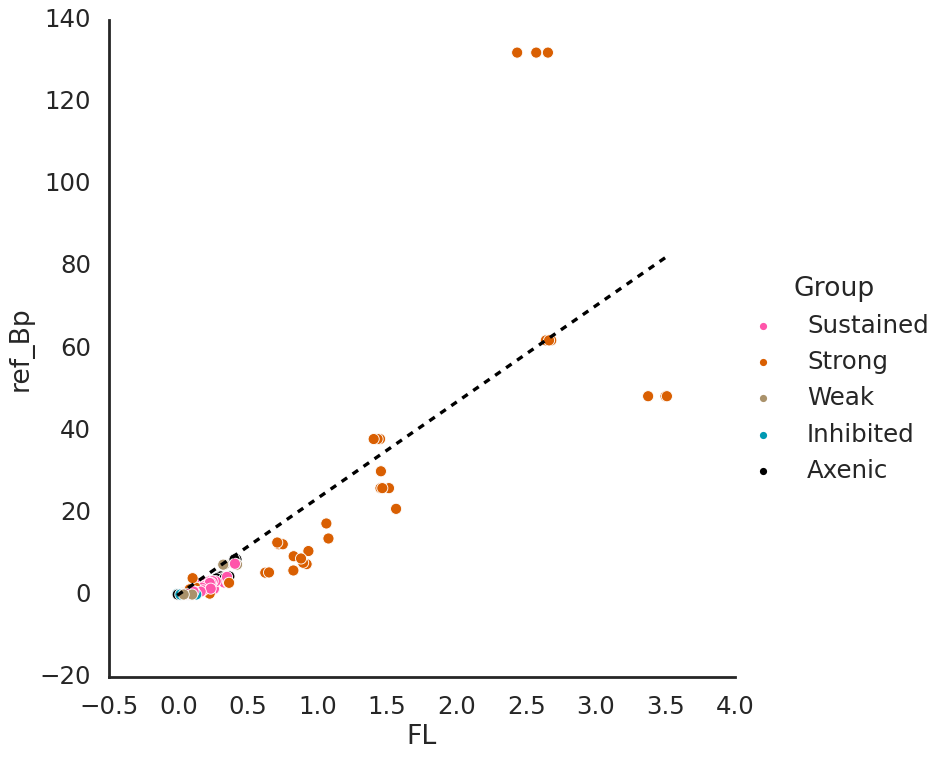

In [57]:
sns.relplot(data=train_df, x='FL', y='ref_Bp', #s=100, 
           height=10,
           #hue='Gr',
            s=100,
            hue='Group', hue_order=gorder, palette=gpalette,
          )

sns.lineplot(data=train_df, x='FL', y='predicted_Bp', color='black', ls='--', legend=False)
#plt.xscale('log')
#plt.yscale('log')

In [58]:
pro99_mdf = pro99_mdf.rename(columns={'Day': 'day'})

In [59]:
pro99_mdf['Group'] = 'Axenic_PRO99'
pro99_mdf['id'] = 'Axenic_PRO99'


In [60]:
pro99_mdf.columns

Index(['Date', 'day', 'Sample', 'FL', 'Group', 'full name', 'predicted',
       'ref_Bp[N]', 'ref_Bp[C]', 'id'],
      dtype='object')

In [61]:
#pmdf['LOD'] = pmdf.FL <= 0.05

In [62]:
pd.concat([mdf.loc[mdf.transfer.isin([0])], pro99_mdf])

,day,Sample,FL,id,replicate,transfer,heterotroph,full name,date,transfer day,Group,predicted,ref_Bp[N],ref_Bp[C],Date
0,0.000000,1A0,0.122,1,A,0.0,Axenic,Axenic,2021-04-22 16:12:00,0.0,Axenic,3.204247e+06,2.860934,18.953691,NaT
1,1.081944,1A0,0.034,1,A,0.0,Axenic,Axenic,2021-04-22 16:12:00,0.0,Axenic,8.929867e+05,0.797310,5.282176,NaT
2,2.164583,1A0,0.159,1,A,0.0,Axenic,Axenic,2021-04-22 16:12:00,0.0,Axenic,4.176026e+06,3.728595,24.701941,NaT
3,2.747222,1A0,0.227,1,A,0.0,Axenic,Axenic,2021-04-22 16:12:00,0.0,Axenic,5.962000e+06,5.323214,35.266293,NaT
4,3.754167,1A0,0.306,1,A,0.0,Axenic,Axenic,2021-04-22 16:12:00,0.0,Axenic,8.036881e+06,7.175786,47.539584,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,80.062500,Pro99_axenicC,0.105,Axenic_PRO99,NaN,NaN,NaN,Axenic_PRO99,NaT,NaN,Axenic_PRO99,2.757753e+06,2.462280,16.312603,2023-03-30 15:00:00
170,83.930556,Pro99_axenicC,0.129,Axenic_PRO99,NaN,NaN,NaN,Axenic_PRO99,NaT,NaN,Axenic_PRO99,3.388097e+06,3.025086,20.041197,2023-04-03 11:50:00
171,85.796528,Pro99_axenicC,0.096,Axenic_PRO99,NaN,NaN,NaN,Axenic_PRO99,NaT,NaN,Axenic_PRO99,2.521374e+06,2.251227,14.914379,2023-04-05 08:37:00
172,91.922222,Pro99_axenicC,0.100,Axenic_PRO99,NaN,NaN,NaN,Axenic_PRO99,NaT,NaN,Axenic_PRO99,2.626432e+06,2.345028,15.535812,2023-04-11 11:38:00


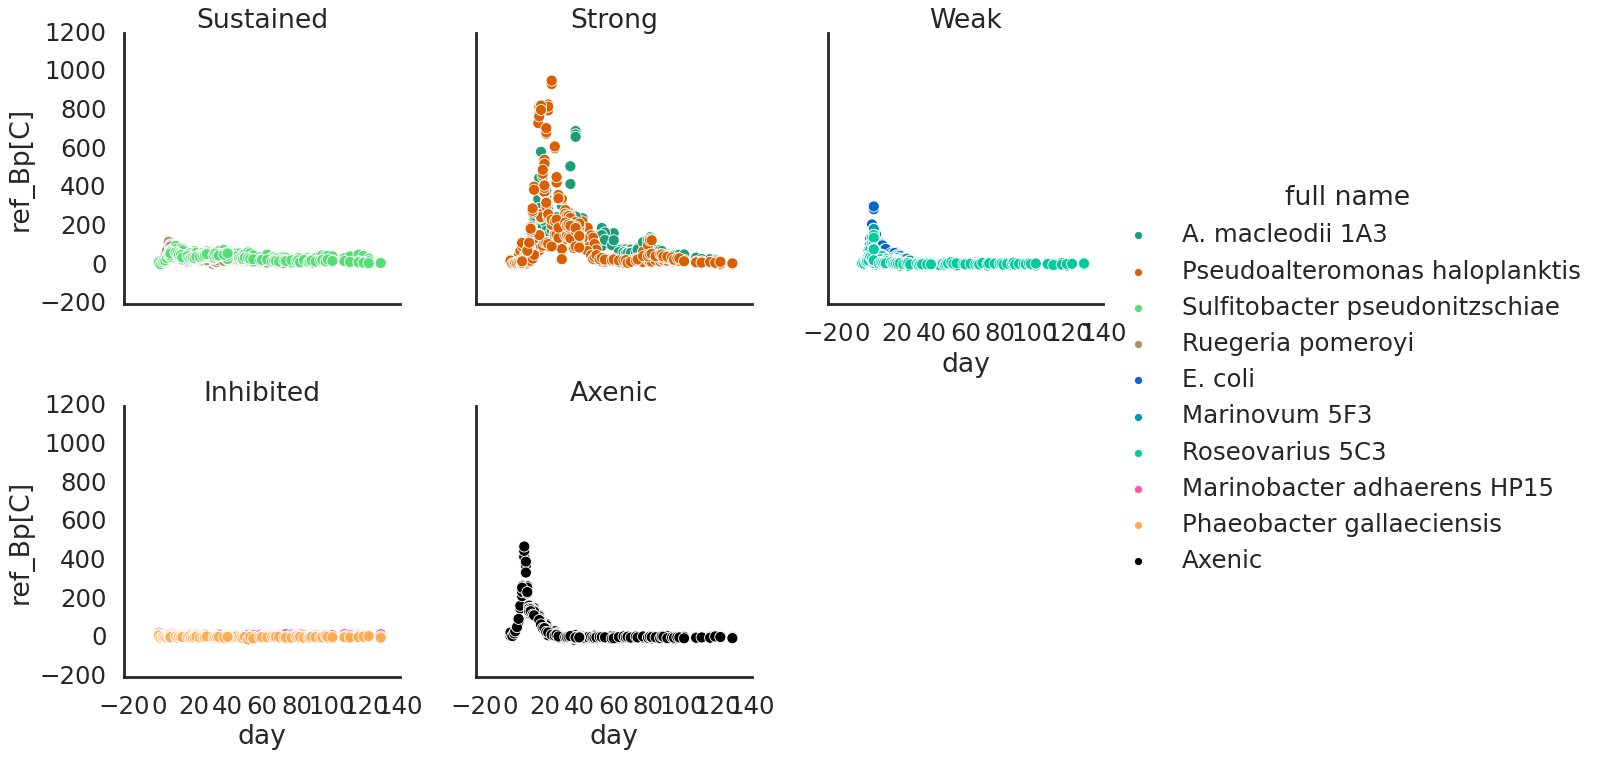

In [63]:
sns.relplot(
    data=mdf.loc[mdf.transfer.isin([0])],
                           
    x='day', y='ref_Bp[C]', #s=100, 
           #height=10,
           #hue='Group',
            s=100,
            col='Group', col_wrap=3, col_order=gorder ,
            hue='full name', palette=hpalette, hue_order=horder,
            #style='LOD',
          ).set_titles(col_template='{col_name}')

#sns.lineplot(data=train_df, x='FL', y='predicted', color='r', legend=False)
#plt.xscale('log')
#plt.yscale('log')
#plt.ylim((0,100))

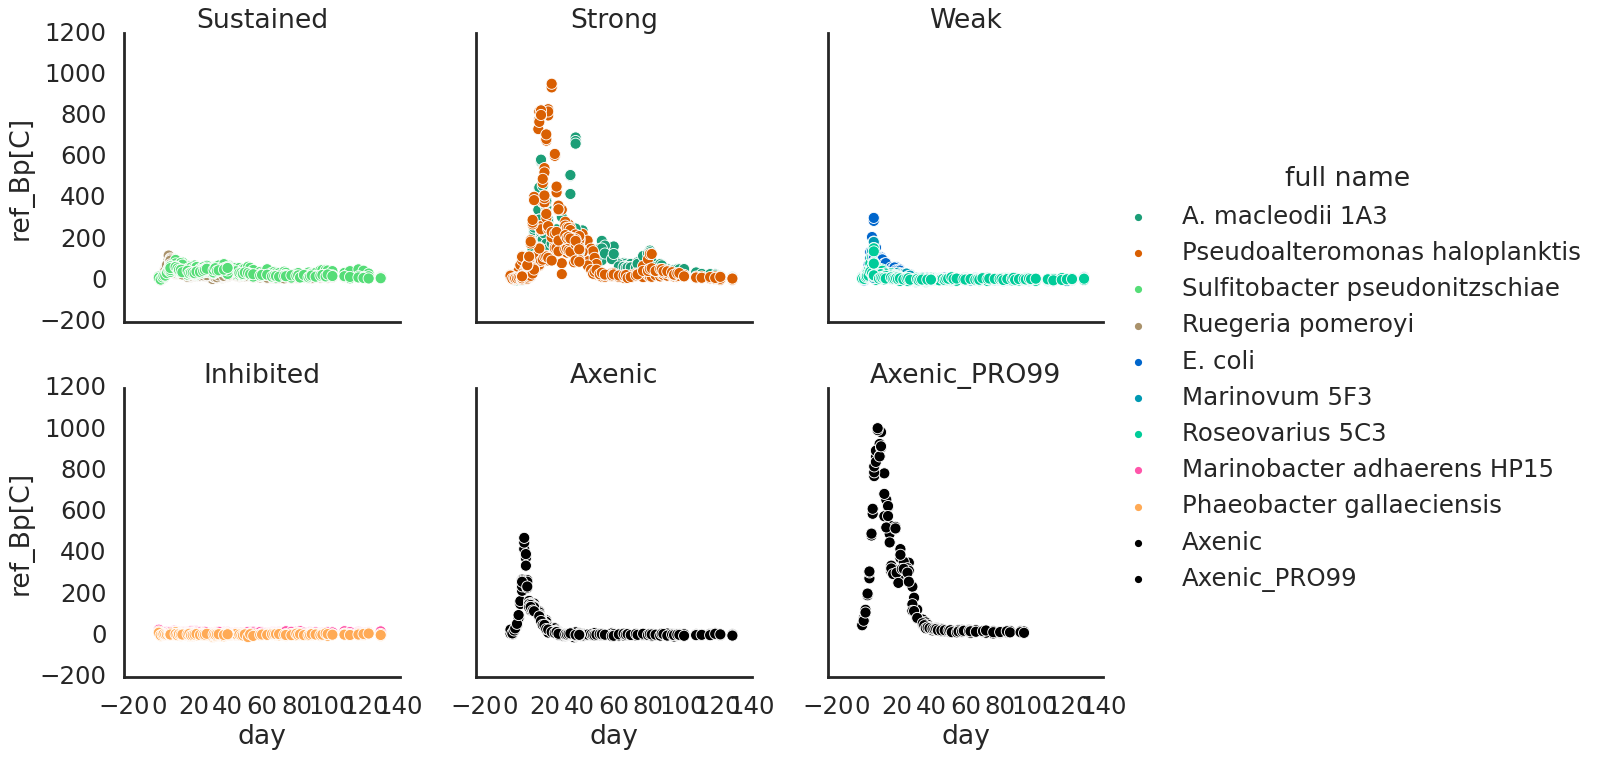

In [64]:
sns.relplot(
    data=pd.concat([mdf.loc[mdf.transfer.isin([0])], pro99_mdf],ignore_index=True ),
                           x='day', y='ref_Bp[C]', #s=100, 
           #height=10,
           #hue='Group',
            s=100,
            col='Group', col_wrap=3, col_order=gorder + ['Axenic_PRO99'],
            hue='full name', palette=hpalette + ['black'], hue_order=horder + ['Axenic_PRO99'],
            #style='LOD',
          ).set_titles(col_template='{col_name}')

#sns.lineplot(data=train_df, x='FL', y='predicted', color='r', legend=False)
#plt.xscale('log')
#plt.yscale('log')
#plt.ylim((0,100))

In [65]:
gpalette

['#ff55aa', '#d95f02', '#aa926b', '#0099b2', 'black']

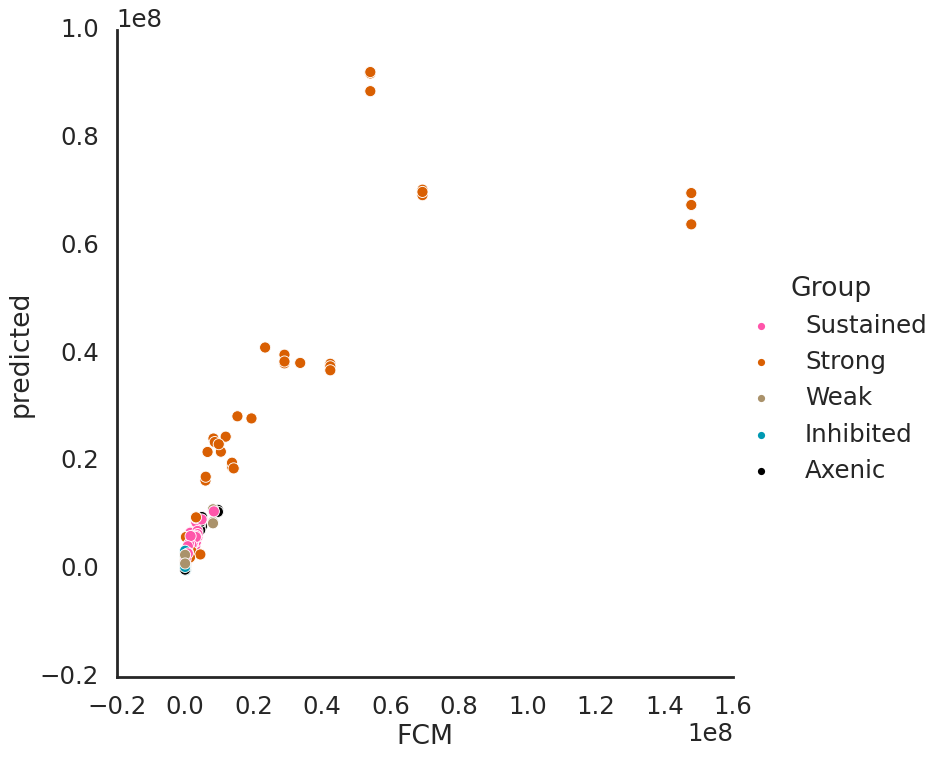

In [66]:
sns.relplot(data=train_df, x='FCM', y='predicted', #s=100, 
           height=10,
           hue='Group', palette=gpalette, hue_order=gorder,
            s=100,
          #  hue='Group'
          )

#sns.lineplot(data=train_df, x='FCM', y='predicted', color='r', legend=False)
#plt.xscale('log')
#plt.yscale('log')

In [67]:
train_df

,tube,Sample,id_x,replicate_x,transfer_x,heterotroph_x,full name_x,date_x,transfer day_x,variable,...,full name_y,date_y,transfer day_y,Group,LOD,log10FCM,log10FL,predicted,predicted_Bp,ref_Bp
0,specimen_1_CC_001_Tube_002_001.fcs,1A0,1,A,1.0,Axenic,Axenic,2021-05-12 11:49:00,19.817361,med4 (FCM),...,Axenic,2021-04-22 16:12:00,0.0,Axenic,False,6.981440,-0.396856,1.053199e+07,9.403563,8.555038
1,specimen_1_CC_001_Tube_002_001.fcs,1A0,1,A,1.0,Axenic,Axenic,2021-05-12 11:49:00,19.817361,med4 (FCM),...,Axenic,2021-04-22 16:12:00,0.0,Axenic,False,6.981440,-0.379864,1.095222e+07,9.778768,8.555038
2,specimen_1_CC_001_Tube_002_001.fcs,1A0,1,A,1.0,Axenic,Axenic,2021-05-12 11:49:00,19.817361,med4 (FCM),...,Axenic,2021-04-22 16:12:00,0.0,Axenic,False,6.981440,-0.394695,1.058452e+07,9.450464,8.555038
3,specimen_1_CC_001_Tube_003_002.fcs,1B0,1,B,1.0,Axenic,Axenic,2021-05-12 11:49:00,19.817361,med4 (FCM),...,Axenic,2021-04-22 16:12:00,0.0,Axenic,False,6.693595,-0.519993,7.931823e+06,7.081985,4.409371
4,specimen_1_CC_001_Tube_003_002.fcs,1B0,1,B,1.0,Axenic,Axenic,2021-05-12 11:49:00,19.817361,med4 (FCM),...,Axenic,2021-04-22 16:12:00,0.0,Axenic,False,6.693595,-0.518557,7.958088e+06,7.105435,4.409371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,specimen_3_CC_Tube_028_154.fcs,5C0,5,C,5.0,CIP,Pseudoalteromonas haloplanktis,2021-08-29 15:49:00,128.984028,med4 (FCM),...,Pseudoalteromonas haloplanktis,2021-04-22 16:12:00,0.0,Strong,False,4.806391,-1.214670,1.602123e+06,1.430467,0.057171
157,specimen_3_CC_Tube_029_155.fcs,6C0,6,C,5.0,DSS-3,Ruegeria pomeroyi,2021-08-29 15:49:00,128.984028,med4 (FCM),...,Ruegeria pomeroyi,2021-04-22 16:12:00,0.0,Sustained,False,5.905975,-0.962574,2.862810e+06,2.556081,0.719047
158,specimen_3_CC_Tube_030_156.fcs,7C0,7,C,5.0,nitzsch,Sulfitobacter pseudonitzschiae,2021-08-29 15:49:00,128.984028,med4 (FCM),...,Sulfitobacter pseudonitzschiae,2021-04-22 16:12:00,0.0,Sustained,False,5.115386,-1.148742,1.864766e+06,1.664970,0.116458
159,specimen_3_CC_Tube_032_157.fcs,9C0,9,C,5.0,k-12,E. coli,2021-08-29 15:49:00,128.984028,med4 (FCM),...,E. coli,2021-04-22 16:12:00,0.0,Weak,False,3.168024,-1.004365,2.600167e+06,2.321578,0.001315


In [68]:
mdf['t'] = mdf['day'] * 3600 * 24

In [69]:
pro99_mdf['t'] = pro99_mdf['day'] * 3600 * 24

In [70]:
mdf.head()

,day,Sample,FL,id,replicate,transfer,heterotroph,full name,date,transfer day,Group,predicted,ref_Bp[N],ref_Bp[C],t
0,0.000000,1A0,0.122,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.0,Axenic,3.204247e+06,2.860934,18.953691,0.0
1,1.081944,1A0,0.034,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.0,Axenic,8.929867e+05,0.797310,5.282176,93480.0
2,2.164583,1A0,0.159,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.0,Axenic,4.176026e+06,3.728595,24.701941,187020.0
3,2.747222,1A0,0.227,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.0,Axenic,5.962000e+06,5.323214,35.266293,237360.0
4,3.754167,1A0,0.306,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.0,Axenic,8.036881e+06,7.175786,47.539584,324360.0


In [71]:
mdf.columns

Index(['day', 'Sample', 'FL', 'id', 'replicate', 'transfer', 'heterotroph',
       'full name', 'date', 'transfer day', 'Group', 'predicted', 'ref_Bp[N]',
       'ref_Bp[C]', 't'],
      dtype='object')

In [72]:
pmdf = mdf.groupby([ 'Sample', 'id', 'replicate', 'transfer', 'transfer day', 'heterotroph',
       'full name', 'Group','t','day',])[['FL', 'ref_Bp[N]','ref_Bp[C]',]].mean().reset_index()



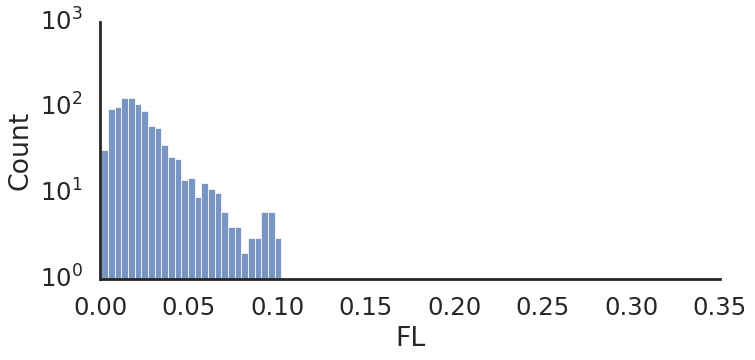

In [73]:
sns.displot(
    mdf.groupby([ 'Sample', 'id', 'replicate', 'transfer', 'transfer day', 'heterotroph',
       'full name', 'Group','t','day',])['FL'].std().dropna(),
    aspect=2,
)
plt.yscale('log')


In [74]:
error_df = mdf.groupby([ 'Sample', 'id','transfer',
   'full name', 'Group','day',])['FL'].agg(['max', 'min',lambda x: x.max() - x.min()])

#error_df.loc[error_df>0].describe()
error_df.nlargest(n=30, columns='<lambda_0>')
#error_df.describe()

max  \
Sample id transfer full name                      Group     day                
2B0    2  0        A. macleodii 1A3               Strong    34.770833  3.294   
                                                            18.711806  3.040   
5C0    5  0        Pseudoalteromonas haloplanktis Strong    16.727083  5.273   
                                                            19.711111  2.655   
5B0    5  0        Pseudoalteromonas haloplanktis Strong    31.818056  1.835   
                                                            20.778472  4.563   
                                                            21.880556  5.350   
2A0    2  0        A. macleodii 1A3               Strong    37.788889  4.467   
7B1    7  1        Sulfitobacter pseudonitzschiae Sustained 12.006944  1.272   
1A0    1  0        Axenic                         Axenic    6.731944   1.586   
1C0    1  0        Axenic                         Axenic    9.745833   1.678   
2B0    2  0        A. macleodii 1A3               Strong    21.880556  1.906   
1A0    1  0        Axenic                         Axenic    9.745833   1.701   
                                                            10.834722  1.078   
2A0    2  0        A. macleodii 1A3               Strong    21.880556  1.768   
5B0    5  0        Pseudoalteromonas haloplanktis Strong    26.747222  2.933   
5C0    5  0        Pseudoalteromonas haloplanktis Strong    17.727083  5.314   
2B0    2  0        A. macleodii 1A3               Strong    31.818056  1.296   
2A1    2  1        A. macleodii 1A3               Strong    6.935417   1.033   
2A0    2  0        A. macleodii 1A3               Strong    26.747222  1.599   
                                                            20.778472  2.298   
5C0    5  0        Pseudoalteromonas haloplanktis Strong    23.898611  1.513   
2C1    2  1        A. macleodii 1A3               Strong    8.040278   0.627   
2A0    2  0        A. macleodii 1A3               Strong    16.727083  1.908   
5C1    5  1        Pseudoalteromonas haloplanktis Strong    4.087500   2.647   
7C1    7  1        Sulfitobacter pseudonitzschiae Sustained 12.006944  1.434   
5C0    5  0        Pseudoalteromonas haloplanktis Strong    37.788889  1.290   
2A0    2  0        A. macleodii 1A3               Strong    25.734722  1.566   
                                                            27.852778  1.445   
2B0    2  0        A. macleodii 1A3               Strong    16.727083  2.904   

                                                                         min  \
Sample id transfer full name                      Group     day                
2B0    2  0        A. macleodii 1A3               Strong    34.770833  2.702   
                                                            18.711806  2.713   
5C0    5  0        Pseudoalteromonas haloplanktis Strong    16.727083  4.953   
                                                            19.711111  2.434   
5B0    5  0        Pseudoalteromonas haloplanktis Strong    31.818056  1.624   
                                                            20.778472  4.367   
                                                            21.880556  5.154   
2A0    2  0        A. macleodii 1A3               Strong    37.788889  4.273   
7B1    7  1        Sulfitobacter pseudonitzschiae Sustained 12.006944  1.079   
1A0    1  0        Axenic                         Axenic    6.731944   1.394   
1C0    1  0        Axenic                         Axenic    9.745833   1.491   
2B0    2  0        A. macleodii 1A3               Strong    21.880556  1.720   
1A0    1  0        Axenic                         Axenic    9.745833   1.516   
                                                            10.834722  0.896   
2A0    2  0        A. macleodii 1A3               Strong    21.880556  1.586   
5B0    5  0        Pseudoalteromonas haloplanktis Strong    26.747222  2.752   
5C0    5  0        Pseudoalteromonas haloplanktis Strong    17.727083  5

In [168]:
error_df = mdf.groupby([ 'Sample', 'id','transfer',
   'full name', 'Group','day',])['FL'].agg(['max', 'min','std',lambda x: x.max() - x.min()])

#error_df.loc[error_df>0].describe()
error_df.nlargest(n=30, columns='<lambda_0>')
#error_df.describe()

max  \
Sample id transfer full name                      Group     day                
2B0    2  0        A. macleodii 1A3               Strong    34.770833  3.294   
                                                            18.711806  3.040   
5C0    5  0        Pseudoalteromonas haloplanktis Strong    16.727083  5.273   
                                                            19.711111  2.655   
5B0    5  0        Pseudoalteromonas haloplanktis Strong    31.818056  1.835   
                                                            20.778472  4.563   
                                                            21.880556  5.350   
2A0    2  0        A. macleodii 1A3               Strong    37.788889  4.467   
7B1    7  1        Sulfitobacter pseudonitzschiae Sustained 12.006944  1.272   
1A0    1  0        Axenic                         Axenic    6.731944   1.586   
1C0    1  0        Axenic                         Axenic    9.745833   1.678   
2B0    2  0        A. macleodii 1A3               Strong    21.880556  1.906   
1A0    1  0        Axenic                         Axenic    9.745833   1.701   
                                                            10.834722  1.078   
2A0    2  0        A. macleodii 1A3               Strong    21.880556  1.768   
5B0    5  0        Pseudoalteromonas haloplanktis Strong    26.747222  2.933   
5C0    5  0        Pseudoalteromonas haloplanktis Strong    17.727083  5.314   
2B0    2  0        A. macleodii 1A3               Strong    31.818056  1.296   
2A1    2  1        A. macleodii 1A3               Strong    6.935417   1.033   
2A0    2  0        A. macleodii 1A3               Strong    26.747222  1.599   
                                                            20.778472  2.298   
5C0    5  0        Pseudoalteromonas haloplanktis Strong    23.898611  1.513   
2C1    2  1        A. macleodii 1A3               Strong    8.040278   0.627   
2A0    2  0        A. macleodii 1A3               Strong    16.727083  1.908   
5C1    5  1        Pseudoalteromonas haloplanktis Strong    4.087500   2.647   
7C1    7  1        Sulfitobacter pseudonitzschiae Sustained 12.006944  1.434   
5C0    5  0        Pseudoalteromonas haloplanktis Strong    37.788889  1.290   
2A0    2  0        A. macleodii 1A3               Strong    25.734722  1.566   
                                                            27.852778  1.445   
2B0    2  0        A. macleodii 1A3               Strong    16.727083  2.904   

                                                                         min  \
Sample id transfer full name                      Group     day                
2B0    2  0        A. macleodii 1A3               Strong    34.770833  2.702   
                                                            18.711806  2.713   
5C0    5  0        Pseudoalteromonas haloplanktis Strong    16.727083  4.953   
                                                            19.711111  2.434   
5B0    5  0        Pseudoalteromonas haloplanktis Strong    31.818056  1.624   
                                                            20.778472  4.367   
                                                            21.880556  5.154   
2A0    2  0        A. macleodii 1A3               Strong    37.788889  4.273   
7B1    7  1        Sulfitobacter pseudonitzschiae Sustained 12.006944  1.079   
1A0    1  0        Axenic                         Axenic    6.731944   1.394   
1C0    1  0        Axenic                         Axenic    9.745833   1.491   
2B0    2  0        A. macleodii 1A3               Strong    21.880556  1.720   
1A0    1  0        Axenic                         Axenic    9.745833   1.516   
                                                            10.834722  0.896   
2A0    2  0        A. macleodii 1A3               Strong    21.880556  1.586   
5B0    5  0        Pseudoalteromonas haloplanktis Strong    26.747222  2.752   
5C0    5  0        Pseudoalteromonas haloplanktis Strong    17.727083  5

In [167]:
error_df = mdf.groupby([ 'Sample', 'id','transfer',
   'full name', 'Group','day',])['FL'].agg(['max', 'min',lambda x: x.max() - x.min()])

#error_df.loc[error_df>0].describe()
error_df.loc[error_df['<lambda_0>']!=0].nsmallest(n=30, columns='max')
#error_df.describe()

,,,,,,max,min,<lambda_0>
Sample,id,transfer,full name,Group,day,,,
1C1,1,1,Axenic,Axenic,12.968056,0.000,-0.038,0.038
9C1,9,1,E. coli,Weak,6.935417,0.005,0.000,0.005
1A1,1,1,Axenic,Axenic,14.961806,0.009,0.000,0.009
3A1,3,1,Marinobacter adhaerens HP15,Inhibited,6.935417,0.009,-0.005,0.014
4A0,4,0,Phaeobacter gallaeciensis,Inhibited,34.770833,0.009,-0.005,0.014
4C1,4,1,Phaeobacter gallaeciensis,Inhibited,4.087500,0.009,0.000,0.009
9C1,9,1,E. coli,Weak,12.006944,0.009,0.005,0.004
10B1,10,1,Marinovum 5F3,Weak,5.911806,0.010,0.005,0.005
10B0,10,0,Marinovum 5F3,Weak,37.788889,0.014,0.009,0.005


In [75]:
# some samples were dropped midway
problematic_samples = pmdf.loc[pmdf.isna().any(axis=1), 'Sample'].unique()
pmdf = pmdf.loc[~pmdf.Sample.isin(problematic_samples)]
pmdf.loc[pmdf.isna().any(axis=1)]


,Sample,id,replicate,transfer,transfer day,heterotroph,full name,Group,t,day,FL,ref_Bp[N],ref_Bp[C]


In [76]:
problematic_samples

array(['10A1', '10B1', '10C1', '11A1', '11B1', '11C1', '7A1', '7B1',
       '7C1', '9A1', '9B1', '9C1'], dtype=object)

In [77]:
pmdf.loc[pmdf.Sample.isin(problematic_samples)]

,Sample,id,replicate,transfer,transfer day,heterotroph,full name,Group,t,day,FL,ref_Bp[N],ref_Bp[C]


In [78]:
pmdf

,Sample,id,replicate,transfer,transfer day,heterotroph,full name,Group,t,day,FL,ref_Bp[N],ref_Bp[C]
0,10A0,10,A,0,0.000000,HOT5_F3,Marinovum 5F3,Weak,0.0,0.000000,0.061,1.430467,9.476845
1,10A0,10,A,0,0.000000,HOT5_F3,Marinovum 5F3,Weak,93480.0,1.081944,0.088,2.063625,13.671514
2,10A0,10,A,0,0.000000,HOT5_F3,Marinovum 5F3,Weak,187020.0,2.164583,0.121,2.837484,18.798332
3,10A0,10,A,0,0.000000,HOT5_F3,Marinovum 5F3,Weak,237360.0,2.747222,0.189,4.432103,29.362685
4,10A0,10,A,0,0.000000,HOT5_F3,Marinovum 5F3,Weak,324360.0,3.754167,0.275,6.448828,42.723483
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6925,9C5,9,C,5,128.984028,k-12,E. coli,Weak,4228200.0,48.937500,0.015,0.351754,2.330372
6926,9C5,9,C,5,128.984028,k-12,E. coli,Weak,4476660.0,51.813194,-0.014,-0.328304,-2.175014
6927,9C5,9,C,5,128.984028,k-12,E. coli,Weak,4560540.0,52.784028,-0.028,-0.656608,-4.350027
6928,9C5,9,C,5,128.984028,k-12,E. coli,Weak,5179500.0,59.947917,-0.014,-0.328304,-2.175014


In [79]:
pmdf.loc[pmdf.transfer.isin([0]) & ~pmdf.id.isin([8])].to_excel('reference_10cc.xlsx', index=False)


In [80]:
pmdf.loc[~pmdf.id.isin([8])].to_excel('reference_10cc_all.xlsx', index=False)


In [81]:
pmdf.loc[mdf.transfer.isin([0]) & ~pmdf.id.isin([8])].groupby(['Sample', 't']).size().sort_values()

Sample  t           
10A0    0.000000e+00    1
4A0     2.223480e+06    1
        2.310960e+06    1
        2.406480e+06    1
        2.573340e+06    1
                       ..
1A0     8.200860e+06    1
        8.366520e+06    1
        8.467020e+06    1
        9.306540e+06    1
5C1     2.867460e+06    1
Length: 3672, dtype: int64

In [82]:
pro99_mdf.to_excel('reference_pro99_axenic.xlsx', index=False)


In [83]:
pmdf.loc[pmdf.transfer.isin([0]) & pmdf.id.isin([1])].to_excel('reference_10cc_axenic.xlsx', index=False)


In [84]:
mdf

,day,Sample,FL,id,replicate,transfer,heterotroph,full name,date,transfer day,Group,predicted,ref_Bp[N],ref_Bp[C],t
0,0.000000,1A0,0.122,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.000000,Axenic,3.204247e+06,2.860934,18.953691,0.0
1,1.081944,1A0,0.034,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.000000,Axenic,8.929867e+05,0.797310,5.282176,93480.0
2,2.164583,1A0,0.159,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.000000,Axenic,4.176026e+06,3.728595,24.701941,187020.0
3,2.747222,1A0,0.227,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.000000,Axenic,5.962000e+06,5.323214,35.266293,237360.0
4,3.754167,1A0,0.306,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.000000,Axenic,8.036881e+06,7.175786,47.539584,324360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9628,48.937500,11C5,0.019,11,C,5,HOT5_C3,Roseovarius 5C3,2021-08-29 15:49:00,128.984028,Weak,4.990220e+05,0.445555,2.951804,4228200.0
9629,51.813194,11C5,0.028,11,C,5,HOT5_C3,Roseovarius 5C3,2021-08-29 15:49:00,128.984028,Weak,7.354008e+05,0.656608,4.350027,4476660.0
9630,52.784028,11C5,0.058,11,C,5,HOT5_C3,Roseovarius 5C3,2021-08-29 15:49:00,128.984028,Weak,1.523330e+06,1.360116,9.010771,4560540.0
9631,59.947917,11C5,0.033,11,C,5,HOT5_C3,Roseovarius 5C3,2021-08-29 15:49:00,128.984028,Weak,8.667224e+05,0.773859,5.126818,5179500.0


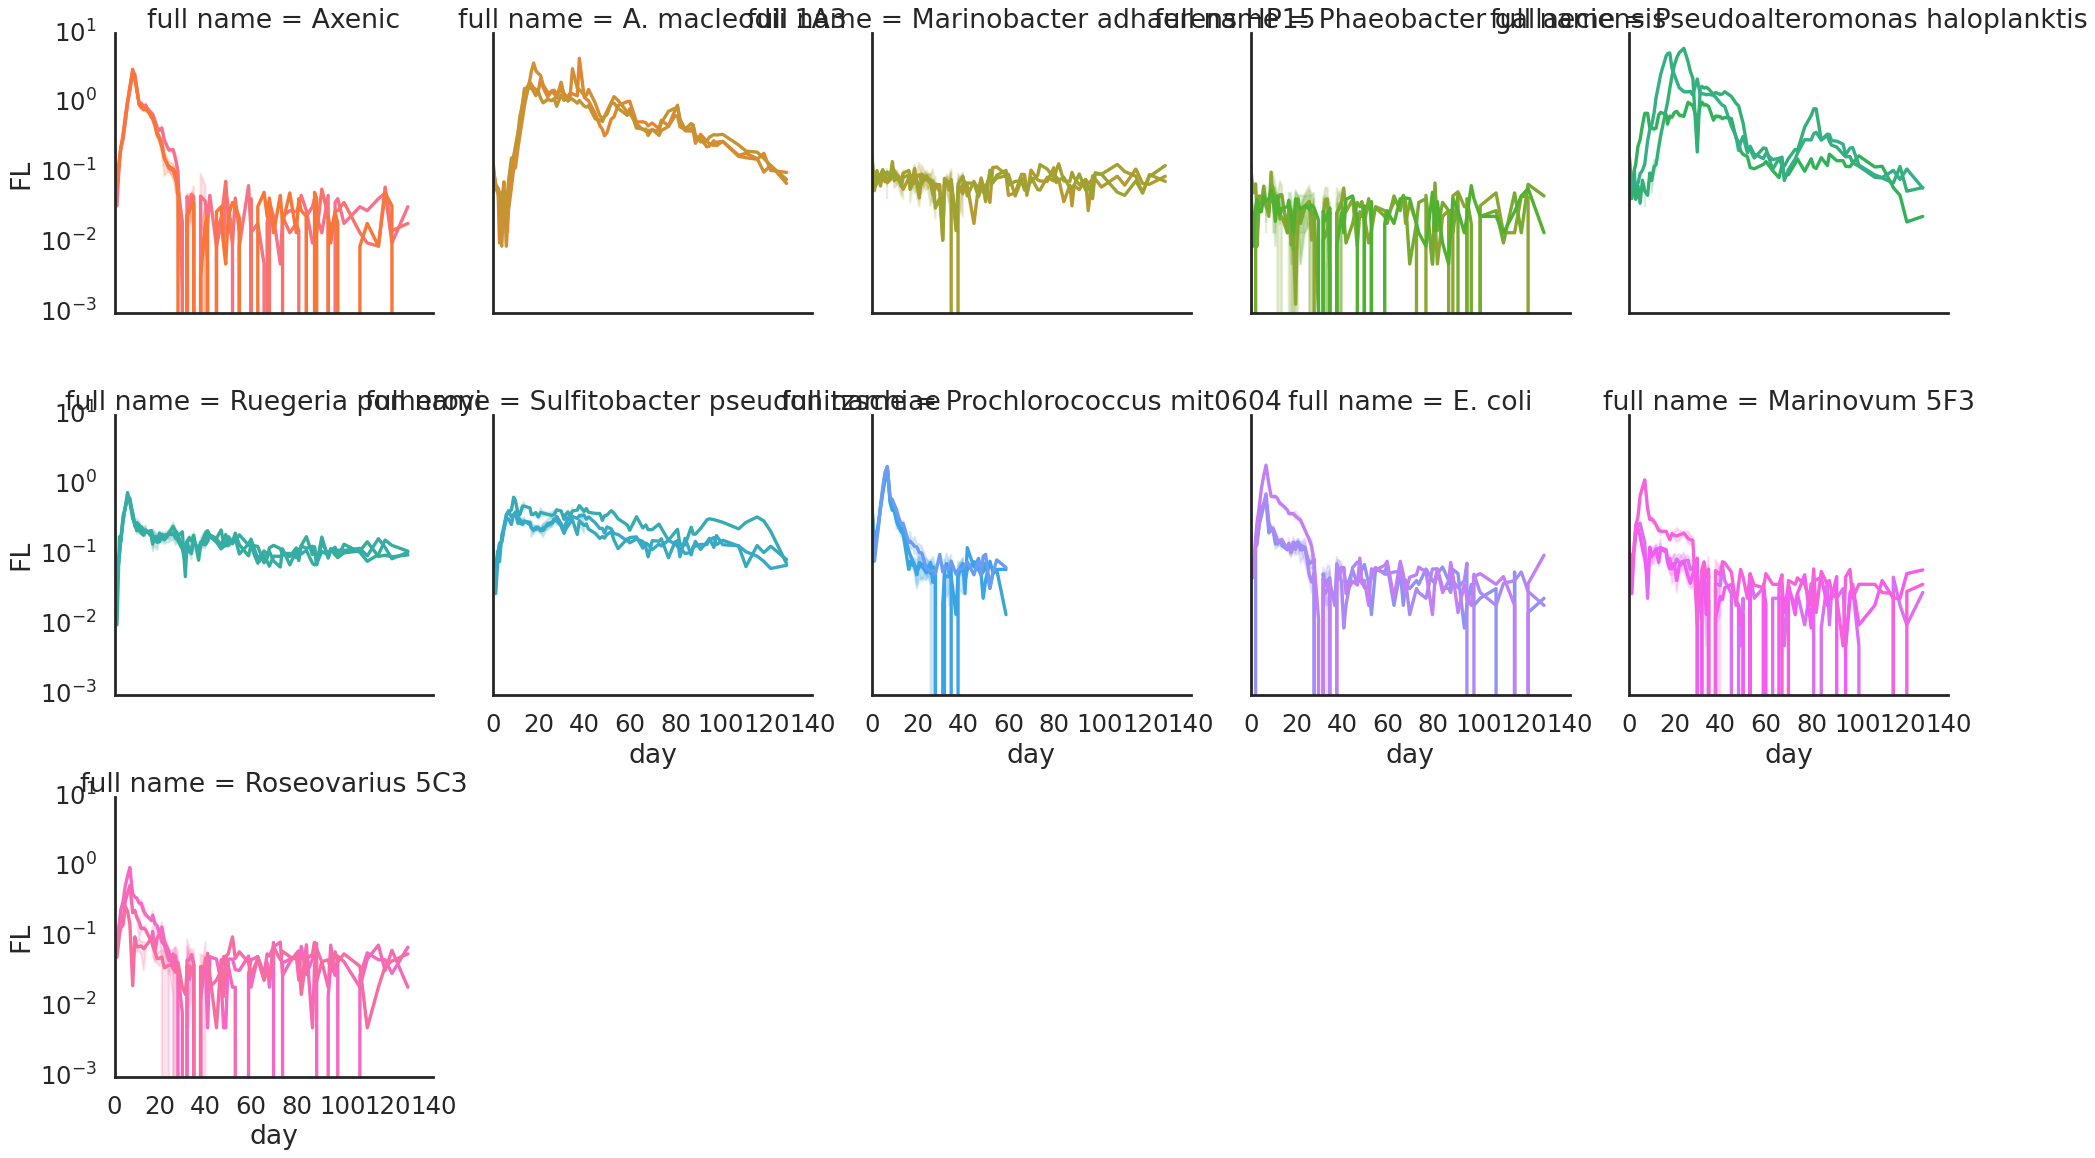

In [85]:
sns.relplot(
    data=mdf.loc[mdf.transfer.isin([0])],
    x='day', y='FL',
    col='full name', hue='Sample', col_wrap=5, 
    legend=False, kind='line',
    
)
plt.yscale('log')

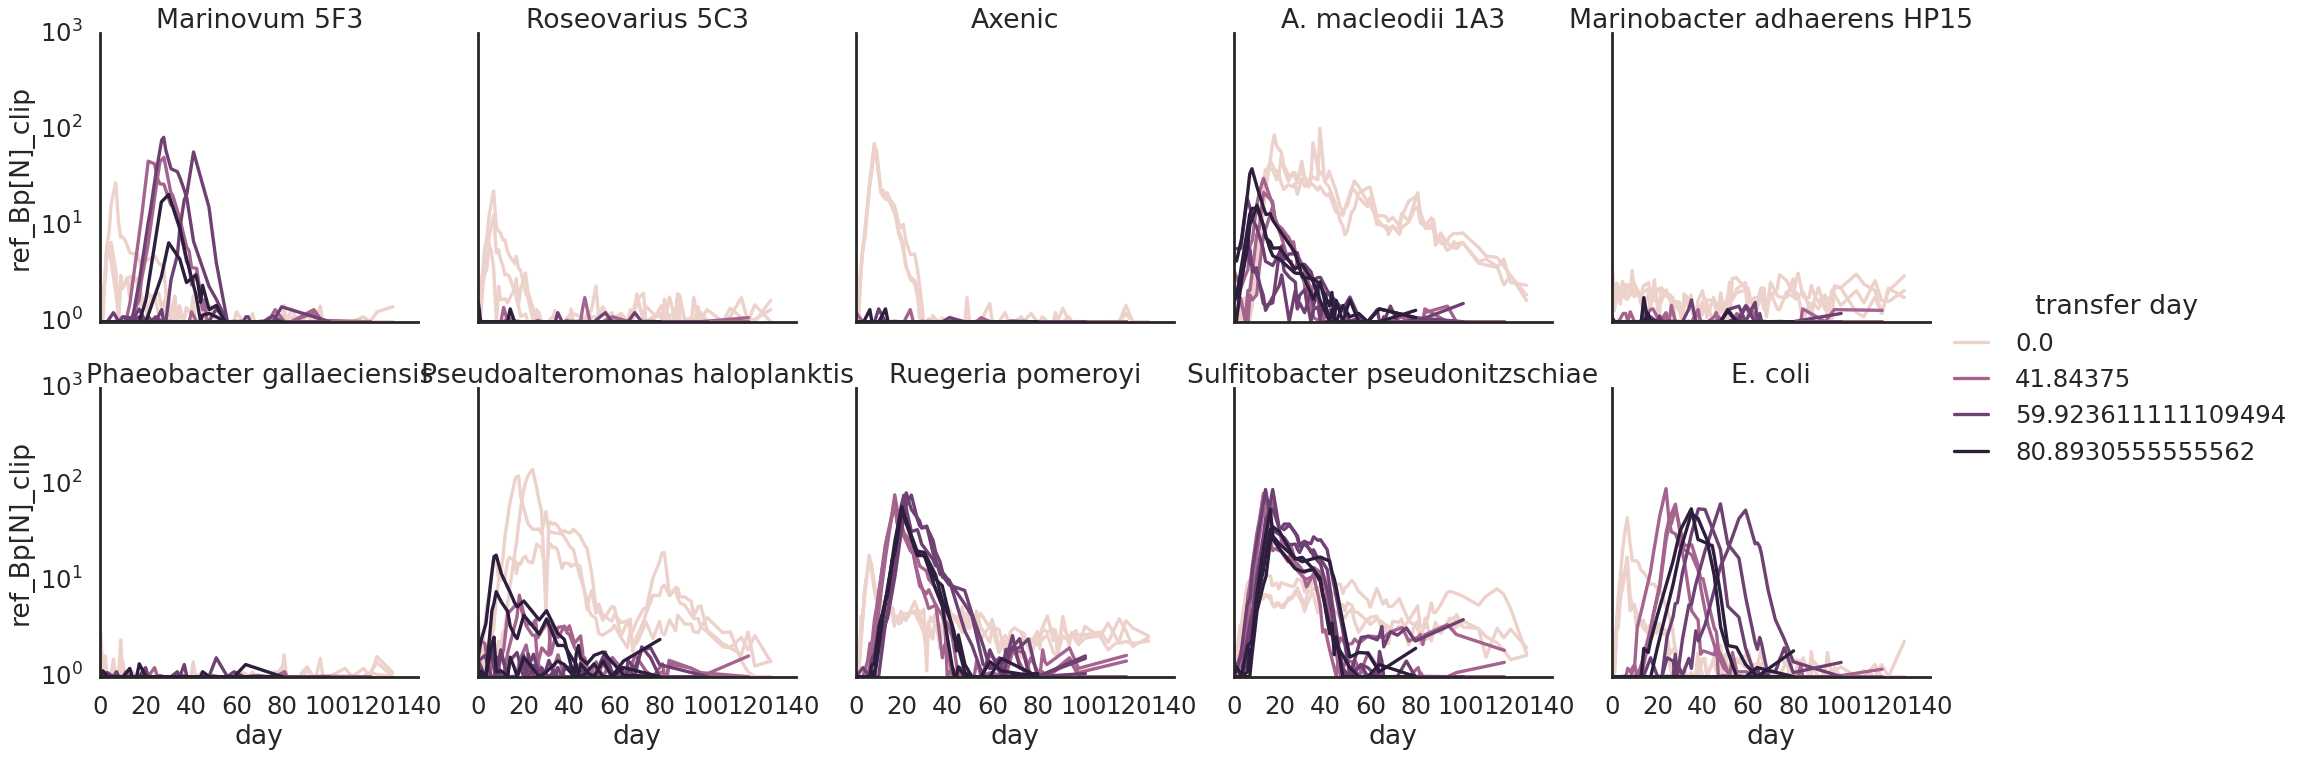

In [86]:
pmdf['ref_Bp[N]_clip'] = pmdf['ref_Bp[N]'].clip(lower=1)
sns.relplot(
    data=pmdf.loc[~pmdf.id.isin([8])& ~pmdf.transfer.isin([1,5])  ],
    x='day', y='ref_Bp[N]_clip',
    col='full name', hue='transfer day', col_wrap=5, 
    #legend=False, 
    kind='line',
    estimator=None, units='Sample',
    
).set_titles(col_template='{col_name}')
plt.yscale('log')

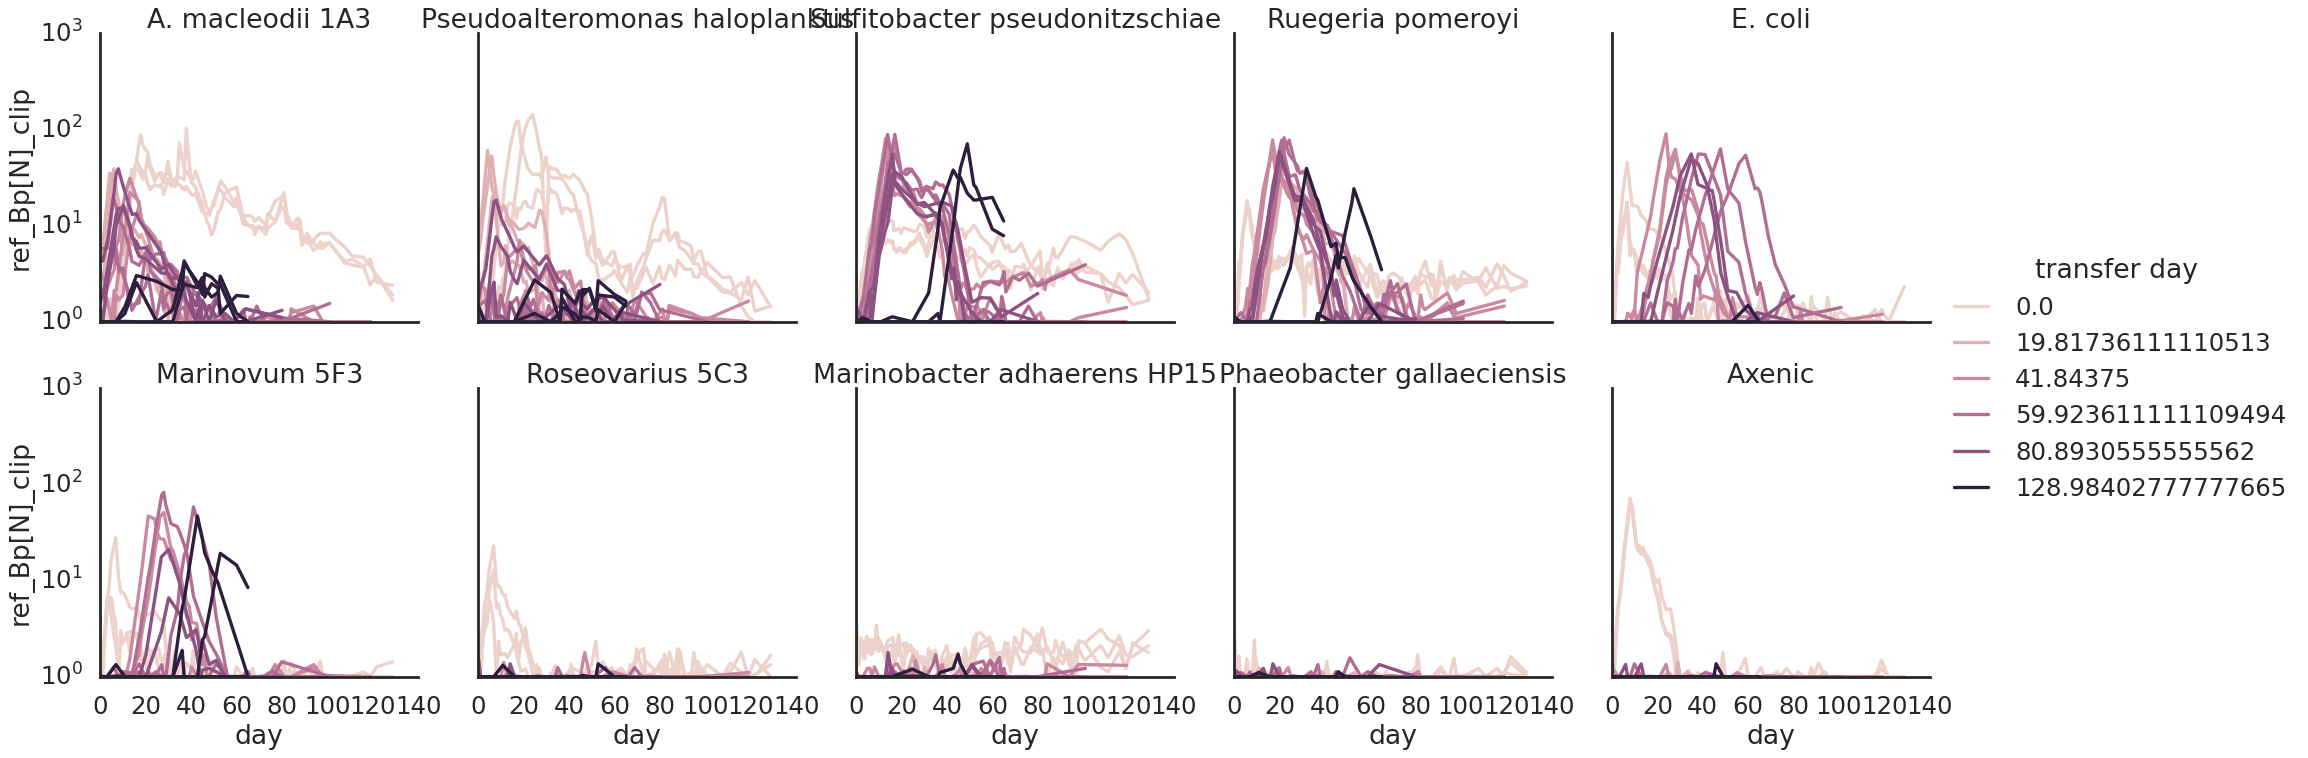

In [87]:
pmdf['ref_Bp[N]_clip'] = pmdf['ref_Bp[N]'].clip(lower=1)
sns.relplot(
    data=pmdf.loc[~pmdf.id.isin([8])  ],
    x='day', y='ref_Bp[N]_clip',
    col='full name', hue='transfer day', col_wrap=5, 
    col_order=horder,
    #legend=False, 
    kind='line',
    estimator=None, units='Sample',
    
).set_titles(col_template='{col_name}')
plt.yscale('log')

In [88]:
pmdf.groupby('transfer day').day.max()

transfer day
0.000000      128.767361
19.817361      59.980556
41.843750     119.040972
59.923611     100.952083
80.893056      79.987500
128.984028     64.945139
Name: day, dtype: float64

# additional data sets

## Yara

In [89]:
xlsx_fname = 'data/Growth curves A-D Yara.xlsx'
y = pd.read_excel(xlsx_fname, sheet_name=None, index_col=[0,1,2], header=None)

In [90]:
def _process(k,d):
    df = d.T
    id_vars = [i for i in df.columns if i[2] in ['Day', 'Date']]
    mdf = df.melt(id_vars=id_vars, var_name=['Sample', 'strain', 'media'], value_name='FL'
                 ).rename(columns={i : i[2] for i in id_vars})
    mdf['sheet_name'] = k
    
    return mdf

yara_df = pd.concat([_process(k, y[k]) for k in y])
yara_df = yara_df.rename(columns={'Day': 'day'})
yara_df['group_sample'] = (yara_df['sheet_name'] + (yara_df['Sample']).astype('string')).astype('object')

In [91]:
gmap = {  '(-) Pro99': 'Pro99',
       '(-) lowN' : 'lowN', '(-) lowP 1:8' : 'lowP(1:8)', '(-) lowP 1:50' :  'lowP(1:50)', }
for i,j in gmap.items():
    yara_df.loc[yara_df.media.isin([i]), 'media'] = j

In [92]:
yara_df = yara_df.reset_index(drop=True)

In [93]:
problematic_samples_yara = yara_df.loc[yara_df.isna().any(axis=1), 'group_sample'].unique()
problematic_samples_yara

array(['SetUp- GroupC 1.0', 'SetUp- GroupC 2.0', 'SetUp- GroupC 3.0',
       'SetUp- GroupC 4.0', 'SetUp- GroupC 5.0', 'SetUp- GroupC 6.0',
       'SetUp- GroupC 7.0', 'SetUp- GroupC 8.0', 'SetUp- GroupC 9.0',
       'SetUp- GroupC 10.0', 'SetUp- GroupC 11.0', 'SetUp- GroupC 12.0',
       'SetUp- GroupC 13.0', 'SetUp- GroupC 14.0', 'SetUp- GroupC 15.0',
       'SetUp- GroupC 16.0', 'SetUp- GroupC 17.0', 'SetUp- GroupC 18.0',
       'SetUp- GroupC 19.0', 'SetUp- GroupC 20.0', 'SetUp- GroupC 21.0',
       'SetUp- GroupC 22.0', 'SetUp- GroupC 23.0', 'SetUp- GroupC 24.0',
       'SetUp- GroupC 25.0', 'SetUp- GroupC 26.0', 'SetUp- GroupC 27.0',
       'SetUp- GroupC 28.0', 'SetUp- GroupC 29.0', 'SetUp- GroupC 30.0',
       'SetUp- GroupC 31.0', 'SetUp- GroupC 32.0', 'SetUp- GroupC 33.0',
       'SetUp- GroupC 34.0', 'SetUp- GroupC 35.0', 'SetUp- GroupC 36.0',
       'SetUp- GroupC 37.0', 'SetUp- GroupC 38.0', 'SetUp- GroupC 39.0',
       'SetUp- GroupC 40.0', 'SetUp- GroupC 41.0', 'SetUp- G

In [94]:
yara_df

,Date,day,Sample,strain,media,FL,sheet_name,group_sample
0,2022-12-05 15:49:00,0,1.0,MED4,Pro99,0.095,SetUp-GroupA,SetUp-GroupA1.0
1,2022-12-06 12:21:00,0.855556,1.0,MED4,Pro99,0.094,SetUp-GroupA,SetUp-GroupA1.0
2,2022-12-07 22:54:00,2.295139,1.0,MED4,Pro99,0.217,SetUp-GroupA,SetUp-GroupA1.0
3,2022-12-08 15:03:00,2.968056,1.0,MED4,Pro99,0.24,SetUp-GroupA,SetUp-GroupA1.0
4,2022-12-09 22:05:00,4.261111,1.0,MED4,Pro99,0.533,SetUp-GroupA,SetUp-GroupA1.0
...,...,...,...,...,...,...,...,...
16375,2023-03-30 15:00:00,80.0625,64.0,ctrl,lowP(1:50),0.005,SetUp- GroupD,SetUp- GroupD64.0
16376,2023-04-03 11:50:00,83.930556,64.0,ctrl,lowP(1:50),-0.005,SetUp- GroupD,SetUp- GroupD64.0
16377,2023-04-05 08:37:00,85.796528,64.0,ctrl,lowP(1:50),0.01,SetUp- GroupD,SetUp- GroupD64.0
16378,2023-04-11 11:38:00,91.922222,64.0,ctrl,lowP(1:50),0.038,SetUp- GroupD,SetUp- GroupD64.0


In [95]:
yara_df.dropna(axis=0, subset='FL', inplace=True)

In [96]:
yara_df.columns

Index(['Date', 'day', 'Sample', 'strain', 'media', 'FL', 'sheet_name',
       'group_sample'],
      dtype='object')

In [97]:
yara_df['Sample_prev'] = yara_df['Sample']
yara_df['Sample'] = (
    'Ax_Media_'+
    yara_df.sheet_name.str.replace('SetUp- Group', '', regex=False).replace('SetUp-GroupA','A', regex=False).str.strip() + 
    yara_df.Sample.astype(int).astype(str))

In [98]:
yara_df.Sample.value_counts().value_counts()

60    76
57    76
58    64
52    48
59    16
Name: Sample, dtype: int64

In [99]:
yara_df.head()

,Date,day,Sample,strain,media,FL,sheet_name,group_sample,Sample_prev
0,2022-12-05 15:49:00,0,Ax_Media_A1,MED4,Pro99,0.095,SetUp-GroupA,SetUp-GroupA1.0,1.0
1,2022-12-06 12:21:00,0.855556,Ax_Media_A1,MED4,Pro99,0.094,SetUp-GroupA,SetUp-GroupA1.0,1.0
2,2022-12-07 22:54:00,2.295139,Ax_Media_A1,MED4,Pro99,0.217,SetUp-GroupA,SetUp-GroupA1.0,1.0
3,2022-12-08 15:03:00,2.968056,Ax_Media_A1,MED4,Pro99,0.24,SetUp-GroupA,SetUp-GroupA1.0,1.0
4,2022-12-09 22:05:00,4.261111,Ax_Media_A1,MED4,Pro99,0.533,SetUp-GroupA,SetUp-GroupA1.0,1.0


In [100]:
yara_df.dtypes

Date            datetime64[ns]
day                     object
Sample                  object
strain                  object
media                   object
FL                      object
sheet_name              object
group_sample            object
Sample_prev            float64
dtype: object

In [101]:
yara_df['id'] = yara_df['strain'].astype(str) + '_' +  yara_df['media']

In [102]:
yara_df['id'].unique()

array(['MED4_Pro99', 'MED4_lowN', 'MED4_lowP(1:8)', 'MED4_lowP(1:50)',
       '9312_Pro99', '9312_lowN', '9312_lowP(1:8)', '9312_lowP(1:50)',
       '9313_Pro99', '9313_lowN', '9313_lowP(1:8)', '9313_lowP(1:50)',
       '1327_Pro99', '1327_lowN', '1327_lowP(1:8)', '1327_lowP(1:50)',
       'MIT0604_Pro99', 'MIT0604_lowN', 'MIT0604_lowP(1:8)',
       'MIT0604_lowP(1:50)', 'NATL2A_Pro99', 'NATL2A_lowN',
       'NATL2A_lowP(1:8)', 'NATL2A_lowP(1:50)', 'ctrl_Pro99', 'ctrl_lowN',
       'ctrl_lowP(1:8)', 'ctrl_lowP(1:50)', '9515_Pro99', '9515_lowN',
       '9515_lowP(1:8)', '9515_lowP(1:50)', '9215_Pro99', '9215_lowN',
       '9215_lowP(1:8)', '9215_lowP(1:50)', 'AS9601_Pro99', 'AS9601_lowN',
       'AS9601_lowP(1:8)', 'AS9601_lowP(1:50)', 'PAC1_Pro99', 'PAC1_lowN',
       'PAC1_lowP(1:8)', 'PAC1_lowP(1:50)', '9202_Pro99', '9202_lowN',
       '9202_lowP(1:8)', '9202_lowP(1:50)', 'SB_Pro99', 'SB_lowN',
       'SB_lowP(1:8)', 'SB_lowP(1:50)', 'MIT0609_Pro99', 'MIT0609_lowN',
       'MIT0609_l

In [103]:
yara_df['Sample'].value_counts()

Ax_Media_A1     60
Ax_Media_A50    60
Ax_Media_A57    60
Ax_Media_A56    60
Ax_Media_A55    60
                ..
Ax_Media_C35    52
Ax_Media_C34    52
Ax_Media_C33    52
Ax_Media_C32    52
Ax_Media_C5     52
Name: Sample, Length: 280, dtype: int64

In [104]:
cols = ['Sample', 'id',  'day', 'strain', 'media', 'FL', ]
yara_df = yara_df[cols].copy()
yara_df['t'] = yara_df['day'] * 3600 * 24

In [105]:
yara_df['Group'] = 'Axenic'
yara_df.loc[~yara_df['strain'].isin(['MED4']),'Group'] = 'Axenic_Other'
yara_df.loc[~yara_df['media'].isin(['lowN']),'Group'] = 'Axenic_Other'
yara_df['full name'] = 'Axenic_' + yara_df['id']
yara_df['predicted'] = results.predict(yara_df['FL'])
yara_df['ref_Bp[N]'] = yara_df['predicted']* Qp * 1e3
yara_df['ref_Bp[C]'] = yara_df['ref_Bp[N]'] * 6.625


In [106]:
yara_df.columns

Index(['Sample', 'id', 'day', 'strain', 'media', 'FL', 't', 'Group',
       'full name', 'predicted', 'ref_Bp[N]', 'ref_Bp[C]'],
      dtype='object')

In [107]:
yara_df.head()

,Sample,id,day,strain,media,FL,t,Group,full name,predicted,ref_Bp[N],ref_Bp[C]
0,Ax_Media_A1,MED4_Pro99,0,MED4,Pro99,0.095,0,Axenic_Other,Axenic_MED4_Pro99,2495110.018244,2.227777,14.759021
1,Ax_Media_A1,MED4_Pro99,0.855556,MED4,Pro99,0.094,73920.0,Axenic_Other,Axenic_MED4_Pro99,2468845.702263,2.204327,14.603663
2,Ax_Media_A1,MED4_Pro99,2.295139,MED4,Pro99,0.217,198300.0,Axenic_Other,Axenic_MED4_Pro99,5699356.56799,5.088711,33.712712
3,Ax_Media_A1,MED4_Pro99,2.968056,MED4,Pro99,0.24,256440.0,Axenic_Other,Axenic_MED4_Pro99,6303435.835565,5.628068,37.285949
4,Ax_Media_A1,MED4_Pro99,4.261111,MED4,Pro99,0.533,368160.0,Axenic_Other,Axenic_MED4_Pro99,13998880.418151,12.499,82.805877


In [135]:
yara_df.groupby(['Group', 'id','full name',  ]).size().head(50)


Group         id                  full name                
Axenic        MED4_lowN           Axenic_MED4_lowN             681
Axenic_Other  1314_Pro99          Axenic_1314_Pro99            174
              1314_lowN           Axenic_1314_lowN             174
              1314_lowP(1:50)     Axenic_1314_lowP(1:50)       174
              1314_lowP(1:8)      Axenic_1314_lowP(1:8)        174
              1327_Pro99          Axenic_1327_Pro99            180
              1327_lowN           Axenic_1327_lowN             180
              1327_lowP(1:50)     Axenic_1327_lowP(1:50)       180
              1327_lowP(1:8)      Axenic_1327_lowP(1:8)        180
              9202_Pro99          Axenic_9202_Pro99            156
              9202_lowN           Axenic_9202_lowN             156
              9202_lowP(1:50)     Axenic_9202_lowP(1:50)       156
              9202_lowP(1:8)      Axenic_9202_lowP(1:8)        156
              9215_Pro99          Axenic_9215_Pro99            171
  

In [108]:
yara_df.to_excel('reference_yara_axenic.xlsx', index=False)


## 5x5

In [137]:
ccpa_df = pd.read_pickle('data/CCPA.pkl.gz')
ccpa_df.loc[ccpa_df.PRO == 'C9B', 'PRO'] = 'MIT0604'


In [138]:
ccpa_df['FL'] = ccpa_df['FL_orig']

In [139]:
ccpa_df

,day,experiment,sample,FL,PRO,ALT,culture,FL_orig,logFL,cumsumFL,cumsumlogFL,zscoreFL,diffFL,difflogFL,diffday,rateFL,ratelogFL,experiment_sample
0,0.000000,e1,1A,0.133,MED4,1A3,Co_Culture,0.133,-2.017406,0.133,-2.017406,-0.588889,NaN,NaN,NaN,NaN,NaN,"e1, 1A"
1,0.715972,e1,1A,0.159,MED4,1A3,Co_Culture,0.159,-1.838851,0.292,-3.856257,-0.575917,0.026,0.178555,0.715972,0.036314,0.249388,"e1, 1A"
2,1.925694,e1,1A,0.155,MED4,1A3,Co_Culture,0.155,-1.864330,0.447,-5.720587,-0.577913,-0.004,-0.025479,1.209722,-0.003307,-0.021062,"e1, 1A"
3,2.831250,e1,1A,0.180,MED4,1A3,Co_Culture,0.180,-1.714798,0.627,-7.435386,-0.565440,0.025,0.149532,0.905556,0.027607,0.165127,"e1, 1A"
4,6.674306,e1,1A,0.632,MED4,1A3,Co_Culture,0.632,-0.458866,1.259,-7.894252,-0.339936,0.452,1.255933,3.843056,0.117615,0.326806,"e1, 1A"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4023,107.860000,e7,37C,0.065,all,all,All_strains,0.065,-2.733368,13.159,-89.618974,-0.486736,0.014,0.242562,4.240000,0.003302,0.057208,"e7, 37C"
4024,109.710000,e7,37C,0.014,all,all,All_strains,0.014,-2.995732,13.209,-92.614706,-0.525767,-0.015,-0.262364,1.850000,-0.008108,-0.141819,"e7, 37C"
4025,114.600000,e7,37C,0.014,all,all,All_strains,0.014,-2.995732,13.259,-95.610438,-0.525767,0.000,0.000000,4.890000,0.000000,0.000000,"e7, 37C"
4026,116.700000,e7,37C,0.032,all,all,All_strains,0.032,-2.995732,13.309,-98.606171,-0.525767,0.000,0.000000,2.100000,0.000000,0.000000,"e7, 37C"


In [140]:
ccpa_df.columns

Index(['day', 'experiment', 'sample', 'FL', 'PRO', 'ALT', 'culture', 'FL_orig',
       'logFL', 'cumsumFL', 'cumsumlogFL', 'zscoreFL', 'diffFL', 'difflogFL',
       'diffday', 'rateFL', 'ratelogFL', 'experiment_sample'],
      dtype='object')

In [141]:
ccpa_df.head()

,day,experiment,sample,FL,PRO,ALT,culture,FL_orig,logFL,cumsumFL,cumsumlogFL,zscoreFL,diffFL,difflogFL,diffday,rateFL,ratelogFL,experiment_sample
0,0.000000,e1,1A,0.133,MED4,1A3,Co_Culture,0.133,-2.017406,0.133,-2.017406,-0.588889,NaN,NaN,NaN,NaN,NaN,"e1, 1A"
1,0.715972,e1,1A,0.159,MED4,1A3,Co_Culture,0.159,-1.838851,0.292,-3.856257,-0.575917,0.026,0.178555,0.715972,0.036314,0.249388,"e1, 1A"
2,1.925694,e1,1A,0.155,MED4,1A3,Co_Culture,0.155,-1.864330,0.447,-5.720587,-0.577913,-0.004,-0.025479,1.209722,-0.003307,-0.021062,"e1, 1A"
3,2.831250,e1,1A,0.180,MED4,1A3,Co_Culture,0.180,-1.714798,0.627,-7.435386,-0.565440,0.025,0.149532,0.905556,0.027607,0.165127,"e1, 1A"
4,6.674306,e1,1A,0.632,MED4,1A3,Co_Culture,0.632,-0.458866,1.259,-7.894252,-0.339936,0.452,1.255933,3.843056,0.117615,0.326806,"e1, 1A"


In [142]:
ccpa_df.loc[ccpa_df.FL_orig.isna()]


,day,experiment,sample,FL,PRO,ALT,culture,FL_orig,logFL,cumsumFL,cumsumlogFL,zscoreFL,diffFL,difflogFL,diffday,rateFL,ratelogFL,experiment_sample


In [143]:
ccpa_df['transfer'] = ccpa_df.experiment.str.replace('e', '').astype(int) 
ccpa_df.loc[ccpa_df['transfer'].isin([1]), 'transfer'] = 0
ccpa_df['transfer'].unique()

array([0, 2, 3, 4, 5, 6, 7])

In [144]:
ccpa_df['Sample'] = '5x5_' + ccpa_df['sample'] + ccpa_df.transfer.astype(str)
ccpa_df['Sample'].unique()

array(['5x5_1A0', '5x5_1B0', '5x5_1C0', '5x5_2A0', '5x5_2B0', '5x5_2C0',
       '5x5_3A0', '5x5_3B0', '5x5_3C0', '5x5_4A0', '5x5_4B0', '5x5_4C0',
       '5x5_5A0', '5x5_5B0', '5x5_5C0', '5x5_6A0', '5x5_6B0', '5x5_6C0',
       '5x5_7A0', '5x5_7B0', '5x5_7C0', '5x5_8A0', '5x5_8B0', '5x5_8C0',
       '5x5_9A0', '5x5_9B0', '5x5_9C0', '5x5_10A0', '5x5_10B0',
       '5x5_10C0', '5x5_11A0', '5x5_11B0', '5x5_11C0', '5x5_12A0',
       '5x5_12B0', '5x5_12C0', '5x5_13A0', '5x5_13B0', '5x5_13C0',
       '5x5_14A0', '5x5_14B0', '5x5_14C0', '5x5_15A0', '5x5_15B0',
       '5x5_15C0', '5x5_16A0', '5x5_16B0', '5x5_16C0', '5x5_17A0',
       '5x5_17B0', '5x5_17C0', '5x5_18A0', '5x5_18B0', '5x5_18C0',
       '5x5_19A0', '5x5_19B0', '5x5_19C0', '5x5_20A0', '5x5_20B0',
       '5x5_20C0', '5x5_21A0', '5x5_21B0', '5x5_21C0', '5x5_22A0',
       '5x5_22B0', '5x5_22C0', '5x5_23A0', '5x5_23B0', '5x5_23C0',
       '5x5_24A0', '5x5_24B0', '5x5_24C0', '5x5_25C0', '5x5_26C0',
       '5x5_27A0', '5x5_27B0', '5x5_27C0'

In [145]:
ccpa_df.Sample.value_counts().value_counts()

88    91
29    78
78    77
53    76
79    74
54    70
65    69
Name: Sample, dtype: int64

In [146]:
ccpa_df.dtypes

day                  float64
experiment            object
sample                object
FL                   float64
PRO                   object
ALT                   object
culture               object
FL_orig              float64
logFL                float64
cumsumFL             float64
cumsumlogFL          float64
zscoreFL             float64
diffFL               float64
difflogFL            float64
diffday              float64
rateFL               float64
ratelogFL            float64
experiment_sample     object
transfer               int64
Sample                object
dtype: object

In [147]:
ccpa_df['id'] = ccpa_df['PRO'] + '_' +  ccpa_df['ALT']

In [148]:
ccpa_df['id'].unique()

array(['MED4_1A3', 'MIT9313_1A3', 'MIT9312_1A3', 'Natl2A_1A3',
       'MIT0604_1A3', 'MED4_DE', 'MIT9313_DE', 'MIT9312_DE', 'Natl2A_DE',
       'MIT0604_DE', 'MED4_DE1', 'MIT9313_DE1', 'MIT9312_DE1',
       'Natl2A_DE1', 'MIT0604_DE1', 'MED4_BS11', 'MIT9313_BS11',
       'MIT9312_BS11', 'Natl2A_BS11', 'MIT0604_BS11', 'MED4_ATCC',
       'MIT9313_ATCC', 'MIT9312_ATCC', 'Natl2A_ATCC', 'MIT0604_ATCC',
       'MIT0604_Ax_Pro', 'Natl2A_Ax_Pro', 'MIT9312_Ax_Pro',
       'MIT9313_Ax_Pro', 'MED4_Ax_Pro', 'allP_all_Pro', 'all_all'],
      dtype=object)

In [149]:
ccpa_df['Sample'].value_counts()

5x5_1A0     88
5x5_20B0    88
5x5_23B0    88
5x5_23A0    88
5x5_22C0    88
            ..
5x5_9A2     29
5x5_8C2     29
5x5_8B2     29
5x5_8A2     29
5x5_37C2    29
Name: Sample, Length: 535, dtype: int64

In [150]:
ccpa_df.columns

Index(['day', 'experiment', 'sample', 'FL', 'PRO', 'ALT', 'culture', 'FL_orig',
       'logFL', 'cumsumFL', 'cumsumlogFL', 'zscoreFL', 'diffFL', 'difflogFL',
       'diffday', 'rateFL', 'ratelogFL', 'experiment_sample', 'transfer',
       'Sample', 'id'],
      dtype='object')

In [151]:
fullname_map = {
    '1A3'  : 'A. macleodii HOT1A3',
    'ATCC' : 'A. macleodii ATCC27126',
    'BS11' : 'A. macleodii BS11',
    'DE1'  : 'A. mediterranea AltDE1',
    'DE'   : 'A. mediterranea AltDE',
    'Ax_Pro' : 'Axenic',
    'all_Pro': 'Axenic',
    'all'    : 'Axenic',
}


In [152]:
ccpa_df['ALT'].unique()

array(['1A3', 'DE', 'DE1', 'BS11', 'ATCC', 'Ax_Pro', 'all_Pro', 'all'],
      dtype=object)

In [153]:
ccpa_df[['PRO', 'ALT', 'culture', 'Sample', 'id']].value_counts()

PRO      ALT     culture     Sample    id            
MED4     1A3     Co_Culture  5x5_1A0   MED4_1A3          88
MIT9312  BS11    Co_Culture  5x5_18C0  MIT9312_BS11      88
         ATCC    Co_Culture  5x5_23B0  MIT9312_ATCC      88
                             5x5_23C0  MIT9312_ATCC      88
         Ax_Pro  Axenic      5x5_28A0  MIT9312_Ax_Pro    88
                                                         ..
         BS11    Co_Culture  5x5_18A2  MIT9312_BS11      29
Natl2A   ATCC    Co_Culture  5x5_24A2  Natl2A_ATCC       29
MIT9312  BS11    Co_Culture  5x5_18B2  MIT9312_BS11      29
                             5x5_18C2  MIT9312_BS11      29
Natl2A   BS11    Co_Culture  5x5_19A2  Natl2A_BS11       29
Length: 535, dtype: int64

In [154]:
ccpa_df['Group'] = 'Axenic'
ccpa_df['full name'] = 'Axenic_' + ccpa_df['PRO']


In [155]:
ccpa_df['culture'].unique()

array(['Co_Culture', 'Axenic', 'All_Pro', 'All_strains'], dtype=object)

In [156]:
ccpa_df['Group'] = ccpa_df['culture'].map({
    'Co_Culture': 'Strong', 
    'Axenic' : 'Axenic',
    'All_Pro' : 'Other', 'All_strains': 'Other'
                                          })

ccpa_df['full name'] = ccpa_df['ALT'].map(fullname_map)
ccpa_df.loc[ccpa_df['Group'].isin(['Axenic']), 'full name'] = 'Axenic_' + ccpa_df.loc[ccpa_df['Group'].isin(['Axenic']),'PRO']
ccpa_df.loc[ccpa_df['Group'].isin(['Axenic']) & ccpa_df['PRO'].isin(['MED4']), 'full name'] = 'Axenic'
ccpa_df.loc[ccpa_df['Group'].isin(['Strong']) & ~ccpa_df['PRO'].isin(['MED4']), 'Group'] = 'Strong_Other'
ccpa_df.loc[ccpa_df['Group'].isin(['Axenic']) & ~ccpa_df['PRO'].isin(['MED4']), 'Group'] = 'Axenic_Other'

ccpa_df['Group'].unique(), ccpa_df['full name'].unique()

(array(['Strong', 'Strong_Other', 'Axenic_Other', 'Axenic', 'Other'],
       dtype=object),
 array(['A. macleodii HOT1A3', 'A. mediterranea AltDE',
        'A. mediterranea AltDE1', 'A. macleodii BS11',
        'A. macleodii ATCC27126', 'Axenic_MIT0604', 'Axenic_Natl2A',
        'Axenic_MIT9312', 'Axenic_MIT9313', 'Axenic'], dtype=object))

In [157]:
ccpa_df.head()

,day,experiment,sample,FL,PRO,ALT,culture,FL_orig,logFL,cumsumFL,...,difflogFL,diffday,rateFL,ratelogFL,experiment_sample,transfer,Sample,id,Group,full name
0,0.000000,e1,1A,0.133,MED4,1A3,Co_Culture,0.133,-2.017406,0.133,...,NaN,NaN,NaN,NaN,"e1, 1A",0,5x5_1A0,MED4_1A3,Strong,A. macleodii HOT1A3
1,0.715972,e1,1A,0.159,MED4,1A3,Co_Culture,0.159,-1.838851,0.292,...,0.178555,0.715972,0.036314,0.249388,"e1, 1A",0,5x5_1A0,MED4_1A3,Strong,A. macleodii HOT1A3
2,1.925694,e1,1A,0.155,MED4,1A3,Co_Culture,0.155,-1.864330,0.447,...,-0.025479,1.209722,-0.003307,-0.021062,"e1, 1A",0,5x5_1A0,MED4_1A3,Strong,A. macleodii HOT1A3
3,2.831250,e1,1A,0.180,MED4,1A3,Co_Culture,0.180,-1.714798,0.627,...,0.149532,0.905556,0.027607,0.165127,"e1, 1A",0,5x5_1A0,MED4_1A3,Strong,A. macleodii HOT1A3
4,6.674306,e1,1A,0.632,MED4,1A3,Co_Culture,0.632,-0.458866,1.259,...,1.255933,3.843056,0.117615,0.326806,"e1, 1A",0,5x5_1A0,MED4_1A3,Strong,A. macleodii HOT1A3


In [158]:
ccpa_df['predicted'] = results.predict(ccpa_df['FL'])
ccpa_df['ref_Bp[N]'] = ccpa_df['predicted']* Qp * 1e3
ccpa_df['ref_Bp[C]'] = ccpa_df['ref_Bp[N]'] * 6.625


In [159]:
ccpa_df['t'] = ccpa_df['day'] * 3600 * 24

In [160]:
ccpa_df = ccpa_df[[
    'Sample', 'id', 'transfer', 
     'PRO', 'ALT', 
    'full name', 'Group', 't', 'day', 'FL', 'ref_Bp[N]', 'ref_Bp[C]',
]]


In [161]:
ccpa_df.head()

,Sample,id,transfer,PRO,ALT,full name,Group,t,day,FL,ref_Bp[N],ref_Bp[C]
0,5x5_1A0,MED4_1A3,0,MED4,1A3,A. macleodii HOT1A3,Strong,0.000000,0.000000,0.133,3.118888,20.662630
1,5x5_1A0,MED4_1A3,0,MED4,1A3,A. macleodii HOT1A3,Strong,61859.999981,0.715972,0.159,3.728595,24.701941
2,5x5_1A0,MED4_1A3,0,MED4,1A3,A. macleodii HOT1A3,Strong,166379.999962,1.925694,0.155,3.634794,24.080508
3,5x5_1A0,MED4_1A3,0,MED4,1A3,A. macleodii HOT1A3,Strong,244620.000000,2.831250,0.180,4.221051,27.964461
4,5x5_1A0,MED4_1A3,0,MED4,1A3,A. macleodii HOT1A3,Strong,576660.000038,6.674306,0.632,14.820578,98.186331


In [162]:
ccpa_df.groupby(['Group', 'id','full name',  ]).size().head(50)


Group         id              full name             
Axenic        MED4_Ax_Pro     Axenic                     264
Axenic_Other  MIT0604_Ax_Pro  Axenic_MIT0604              88
              MIT9312_Ax_Pro  Axenic_MIT9312             264
              MIT9313_Ax_Pro  Axenic_MIT9313             264
              Natl2A_Ax_Pro   Axenic_Natl2A              264
Other         allP_all_Pro    Axenic                     892
              all_all         Axenic                    1338
Strong        MED4_1A3        A. macleodii HOT1A3       1208
              MED4_ATCC       A. macleodii ATCC27126    1115
              MED4_BS11       A. macleodii BS11         1129
              MED4_DE         A. mediterranea AltDE     1338
              MED4_DE1        A. mediterranea AltDE1    1338
Strong_Other  MIT0604_1A3     A. macleodii HOT1A3       1338
              MIT0604_ATCC    A. macleodii ATCC27126     446
              MIT0604_BS11    A. macleodii BS11         1273
              MIT0604_DE      A.

In [163]:
ccpa_df.to_excel('reference_ccpa.xlsx', index=False)
